# <center> **Predicting Aviation Accident Severity: A Data-Driven Approach to Enhancing Air Travel Safety** </center>

#### **Done by:**

  #### - **Pramod Kumar (UID:121032911)**
  #### - **Swapnita Sahu (UID:121292223)**

# Table of Contents

1. [**Introduction**](#Introduction)
2. [**Importing Necessary Libraries**](#Importing-Necessary-Libraries)
3. [**Data Collection**](#Data-Collection)
4. [**Downloading a dataset from Kaggle**](#Downloading-a-dataset-from-Kaggle)
5. [**Data Import**](#Data-Import)
6. [**Data Cleaning**](#Data-Cleaning)
7. [**Exploratory Data Analysis**](#Exploratory-Data-Analysis)
    - [**Outlier Analysis**](#Outlier-Analysis)
    - [**Distributions of Variables**](#Distributions-of-Variables)
    - [**Handling Skewness**](#Handling-Skewness)
    - [**Feature Correlations**](#Feature-Correlations)
8. [**Bivariate Analysis**](#Bivariate-analysis)
9. [**Feature Scaling**](#Feature-Scaling)
10. [**Model Building**](#Model-Building)
    - [**Feature Selection**](#Feature-Selection)
    - [**Train-Test Split**](#Train-Test-Split)
11. [**Model Training**](#Model-Training)
    - [**Baseline Models**](#Baseline-Models)
    - [**Neural Network**](#Neural-Network)
12. [**Model Evaluation**](#Model-Evaluation)
    - [**Performance Metrics**](#Performance-Metrics)
    - [**Confusion Matrix**](#Confusion-Matrix)
13. [**Conclusion**](#Conclusion)


### **Introduction**

The aviation industry is a global powerhouse, with millions of flights operated each year. Though air travel
is one of the safest modes of transportation, yet the stakes remain high when accidents do occur. A single
crash can ripple through economies, impact regulatory policies, and shift public perception of air travel.
Understanding and predicting the severity of these crashes is not only crucial for enhancing safety
protocols but also for minimizing the impact on passengers, crews, and the wider community. Moreover,
as the aviation industry continues to evolve, with the introduction of new aircraft technologies and
operational protocols, a data-driven approach to understanding potential crash outcomes becomes even
more vital.


Recent events have underscored the importance of this issue. For instance, the tragic crash of a passenger
plane in early 2024 raised questions about existing safety measures and the effectiveness of current
predictive models. Investigations revealed that while initial crash predictions indicated low risk,
unforeseen factors led to a disastrous outcome. Such incidents highlight the necessity for more robust
predictive frameworks that can analyze various parameters—including weather conditions, human
factors, and aircraft maintenance history—to provide more accurate severity assessments.


This project sits at the intersection of machine learning and real-world applications, showcasing the
transformative power of data science in critical fields. By leveraging advanced algorithms and big data
analytics, we can derive insights from vast amounts of historical flight data, accident reports, and
environmental conditions. As we embark on this project, we aim not only to contribute to the body of
knowledge in aviation safety but also to illustrate how data science can drive meaningful change in sectors
that affect our daily lives. By harnessing the power of machine learning, we strive to create a safer future
for air travel, ensuring that lessons learned from past incidents lead to actionable insights that protect
lives.

## **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import os
from scipy import stats

from google.colab import files
import os

import warnings
warnings.filterwarnings(action= 'ignore')

To get started with this tutorial, the first step is to import the essential Python libraries, as demonstrated above. These libraries will be instrumental throughout the process. Using Jupyter Notebook is highly recommended for this tutorial.

A key library we’ll work with is Pandas, a powerful open-source tool for data analysis built on Python. It offers a user-friendly and flexible approach to data manipulation, allowing us to perform a variety of transformations effortlessly.

Another critical library we'll utilize is NumPy, which is designed for high-performance computations on large datasets. It provides a robust framework for storing, processing, and performing complex operations on data, streamlining the analysis process.

## **Setting a common style to visualize plots**

In [ ]:
sns.set_theme(style="whitegrid", palette="deep")

## **Data Collection**

The Airplane Accidents Severity Dataset on Kaggle provides detailed information on airplane accidents that occurred between 2010 and 2018. It consists of two CSV files: "train.csv" and "test.csv". The training dataset contains 10,000 rows and 13 columns, while the testing dataset includes 2,725 rows and 12 columns. Each row corresponds to a unique airplane accident. The dataset features the following columns:

* Accident_ID: A unique identifier assigned to each accident.
* Accident_Type_Code: A numerical code indicating the type of accident (e.g., "1" for "Controlled Flight Into Terrain," "2" for "Loss of Control In Flight," etc.).
* Cabin_Temperature: The cabin temperature at the time of the accident, measured in degrees Celsius.
* Turbulence_In_gforces: The g-force experienced by the aircraft during the incident.
* Control_Metric: A measure of the pilot's ability to maintain control during the accident.
* Total_Safety_Complaints: The total number of safety complaints filed against the airline in the 12 months leading up to the accident.
* Days_Since_Inspection: The number of days since the aircraft's last inspection.
* Safety_Score: A metric that evaluates the overall safety performance of the airline.
* Severity: The severity level of the accident, categorized as "Minor_Damage_And_Injuries," "Significant_Damage_And_Fatalities," "Significant_Damage_And_Serious_Injuries," or "Highly_Fatal_And_Damaging."
* Accident_Type_Description: A detailed description of the type of accident.
* Max_Elevation: The highest altitude achieved by the aircraft during the flight.
* Violations: The number of safety violations recorded for the airline in the 12 months preceding the accident.
* Adverse_Weather_Metric: A metric assessing weather conditions during the time of the accident.

## **Downloading a dataset from Kaggle**

- Create your API token in your kaggle account.
- Download your token as kaggle.json
- Upload it in google colab.
- Create a root directory for kaggle in your directory, upload the .json file here.
- Give it permission.
- Download the dataset
- Unzip it and start using it.

### **Data Import**


In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0    31335.47682           3                0.424352         7570  
1    26024.71106           2                0.352350        12128  
2    39269.05393           3                0.003364         2181  
3    42771.49920           1                0.211728         5946  
4    35509.22852           2                0.176883         9054

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                        6   
1     58.173516                     15                        3   
2     33.287671                     15                        3   
3      3.287671                     21                        5   
4     10.867580                     18                        2   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       72.151322               0.388959              78.32   
1       64.585232               0.250841              78.60   
2       64.721969               0.336669              86.96   
3       66.362808               0.421775              80.86   
4       56.107566               0.313228              79.22   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   4   37949.724386           2                0.069692   
1                   7   30194.805567           2                0.002777   
2                   6   17572.925484           1                0.004316   
3                   3   40209.186341           2                0.199990   
4                   2   35495.525408           2                0.483696   

   Accident_ID  
0            1  
1           10  
2           14  
3           17  
4           21

In [ ]:
df_train.shape

(10000, 12)

In [ ]:
df_train.describe()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
count  10000.000000           10000.000000             10000.000000   
mean      41.876406              12.931100                 6.564300   
std       16.138072               3.539803                 6.971982   
min        0.000000               1.000000                 0.000000   
25%       30.593607              11.000000                 2.000000   
50%       41.278539              13.000000                 4.000000   
75%       52.511416              15.000000                 9.000000   
max      100.000000              23.000000                54.000000   

       Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
count    10000.000000           10000.000000       10000.000000   
mean        65.145324               0.381495          79.969331   
std         11.882934               0.121301           2.759739   
min          0.000000               0.134000          74.740000   
25%         56.927985               0.293665          77.960000   
50%         65.587967               0.365879          79.540000   
75%         73.336372               0.451346          81.560000   
max        100.000000               0.882648          97.510000   

       Accident_Type_Code  Max_Elevation   Violations  Adverse_Weather_Metric  \
count        10000.000000   10000.000000  10000.00000            10000.000000   
mean             3.814900   32001.803282      2.01220                0.255635   
std              1.902577    9431.995196      1.03998                0.381128   
min              1.000000     831.695553      0.00000                0.000316   
25%              2.000000   25757.636910      1.00000                0.012063   
50%              4.000000   32060.336420      2.00000                0.074467   
75%              5.000000   38380.641515      3.00000                0.354059   
max              7.000000   64297.651220      5.00000                2.365378   

        Accident_ID  
count  10000.000000  
mean    6266.554200  
std     3610.170288  
min        2.000000  
25%     3139.750000  
50%     6280.500000  
75%     9391.500000  
max    12500.000000

In [ ]:
df_test.shape

(2500, 11)

In [ ]:
df_test.describe()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
count   2500.000000            2500.000000              2500.000000   
mean      41.825224              12.946400                 6.574800   
std       16.280187               3.523364                 7.179542   
min        0.000000               1.000000                 0.000000   
25%       30.593607              11.000000                 1.000000   
50%       41.461187              13.000000                 4.000000   
75%       52.751142              15.000000                 9.000000   
max      100.000000              23.000000                54.000000   

       Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
count     2500.000000            2500.000000        2500.000000   
mean        65.368058               0.376197          79.993068   
std         11.442005               0.116960           2.713833   
min         20.966272               0.143376          74.740000   
25%         57.702826               0.292583          77.930000   
50%         66.066545               0.357404          79.600000   
75%         73.119872               0.441699          81.530000   
max         97.994531               0.881926          94.200000   

       Accident_Type_Code  Max_Elevation   Violations  Adverse_Weather_Metric  \
count         2500.000000    2500.000000  2500.000000             2500.000000   
mean             3.853600   32383.134179     1.990800                0.250886   
std              1.877652    9485.096436     1.018592                0.387663   
min              1.000000     831.695553     0.000000                0.000368   
25%              2.000000   26008.851717     1.000000                0.013136   
50%              4.000000   32472.865497     2.000000                0.072466   
75%              5.000000   38759.519071     3.000000                0.315407   
max              7.000000   62315.408444     5.000000                2.365378   

        Accident_ID  
count   2500.000000  
mean    6186.283200  
std     3602.235035  
min        1.000000  
25%     3071.750000  
50%     6159.500000  
75%     9309.250000  
max    12493.000000

### **Data Cleaning**

* The code given below checks for missing values in the training and testing datasets by summing the null entries for each column.
* It helps identify which columns have missing values and their extent.

In [ ]:
df_train.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [ ]:
df_test.isnull().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

- The `Accident_ID` column has 10 missing values. Considering the dataset contains 10,000 records, removing these 10 rows is a reasonable approach. This represents only 0.1% of the data, and the impact on the analysis or model performance will be negligible.

- By removing Accident_ID and Accident_Type_Code, we ensure the dataset maintains its integrity and avoids issues caused by missing values, ultimately resulting in a more reliable dataset for further analysis or machine learning tasks.


In [ ]:
# Removing rows where Accident_ID is null
df_train = df_train.dropna(subset=['Accident_ID'])

# Verifying the changes
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB
None


In [ ]:
testing2= df_test.drop(['Accident_Type_Code'], axis=1)
testing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Safety_Score             2500 non-null   float64
 1   Days_Since_Inspection    2500 non-null   int64  
 2   Total_Safety_Complaints  2500 non-null   int64  
 3   Control_Metric           2500 non-null   float64
 4   Turbulence_In_gforces    2500 non-null   float64
 5   Cabin_Temperature        2500 non-null   float64
 6   Max_Elevation            2500 non-null   float64
 7   Violations               2500 non-null   int64  
 8   Adverse_Weather_Metric   2500 non-null   float64
 9   Accident_ID              2500 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 195.4 KB


In [ ]:
#Print their respective shapes
print("Shape of training data is:", df_train.shape)
print("Shape of testing data is:", testing2.shape)

Shape of training data is: (10000, 12)
Shape of testing data is: (2500, 10)


In [ ]:
df_train['Severity'].value_counts()

Severity
Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: count, dtype: int64

We count the occurrences of each unique value in the Severity column to understand its distribution.

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import process

# Define the list of correct categories
valid_categories = [
    'Highly_Fatal_And_Damaging',
    'Significant_Damage_And_Serious_Injuries',
    'Minor_Damage_And_Injuries',
    'Significant_Damage_And_Fatalities'
]

# Function to match each value to the closest valid category
def match_severity(value):
    return process.extractOne(value, valid_categories)[0]

# Apply the function to the 'Severity' column
df_train['Severity'] = df_train['Severity'].apply(match_severity)

# Verify the changes
print(df_train['Severity'].value_counts())


Severity
Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: count, dtype: int64


* The above code installs the fuzzywuzzy library, which helps with string matching and correction.
* The process module is used to find the closest matching string from a list of valid categories.
* Defines a list of valid severity categories.
* Applies fuzzy matching to the Severity column to correct any inconsistent or misspelled entries.
* Ensures that the Severity column values align with the predefined valid categories.

In [ ]:
df_train['Cabin_Temperature'].value_counts()

Cabin_Temperature
78.46    48
80.98    43
78.37    42
79.17    41
81.26    40
         ..
81.65     1
78.07     1
85.25     1
80.10     1
85.31     1
Name: count, Length: 950, dtype: int64

We count the frequency of each unique value in the Cabin_Temperature column.

In [ ]:
# Filter rows where Cabin_Temperature is 0
cabin_temp_zero = df_train[df_train['Cabin_Temperature'] == 0]

# Display the rows with Cabin_Temperature = 0
cabin_temp_zero

Empty DataFrame
Columns: [Severity, Safety_Score, Days_Since_Inspection, Total_Safety_Complaints, Control_Metric, Turbulence_In_gforces, Cabin_Temperature, Accident_Type_Code, Max_Elevation, Violations, Adverse_Weather_Metric, Accident_ID]
Index: []

The above code filters and displays rows where Cabin_Temperature is 0, which might indicate incorrect or missing data.

In [ ]:
# Calculate the median of Cabin_Temperature excluding zeros
median_temp = df_train.loc[df_train['Cabin_Temperature'] != 0, 'Cabin_Temperature'].median()

# Replace all Cabin_Temperature = 0 with the median
df_train.loc[df_train['Cabin_Temperature'] == 0, 'Cabin_Temperature'] = median_temp

# Verify the changes
print(f"Median used for replacement: {median_temp}")
df_train['Cabin_Temperature'].value_counts()


Median used for replacement: 79.54


Cabin_Temperature
78.46    48
80.98    43
78.37    42
79.17    41
81.26    40
         ..
81.65     1
78.07     1
85.25     1
80.10     1
85.31     1
Name: count, Length: 950, dtype: int64

* We calculate the median of the Cabin_Temperature column, excluding rows where the value is 0.
* Median is chosen as it is less sensitive to outliers compared to the mean, ensuring a robust replacement value.
* All occurrences of 0 are replaced in the Cabin_Temperature column with the calculated median. This ensures the dataset does not contain invalid values while preserving the column's overall distribution.
* We confirm the value used for replacement and verifies the updated frequency distribution of Cabin_Temperature.

In [ ]:
df_train= df_train.drop(['Accident_ID'], axis=1)
df_train.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  
0    31335.47682           3                0.424352  
1    26024.71106           2                0.352350  
2    39269.05393           3                0.003364  
3    42771.49920           1                0.211728  
4    35509.22852           2                0.176883

We removed the Accident_ID column from the training dataset.
* Accident_ID: A unique identifier that does not contribute directly to the analysis or model building.

### **Exploratory Data Analysis**

The dataset is now clean, consistent, and ready for reliable analysis or modeling

### **Outlier Analysis**

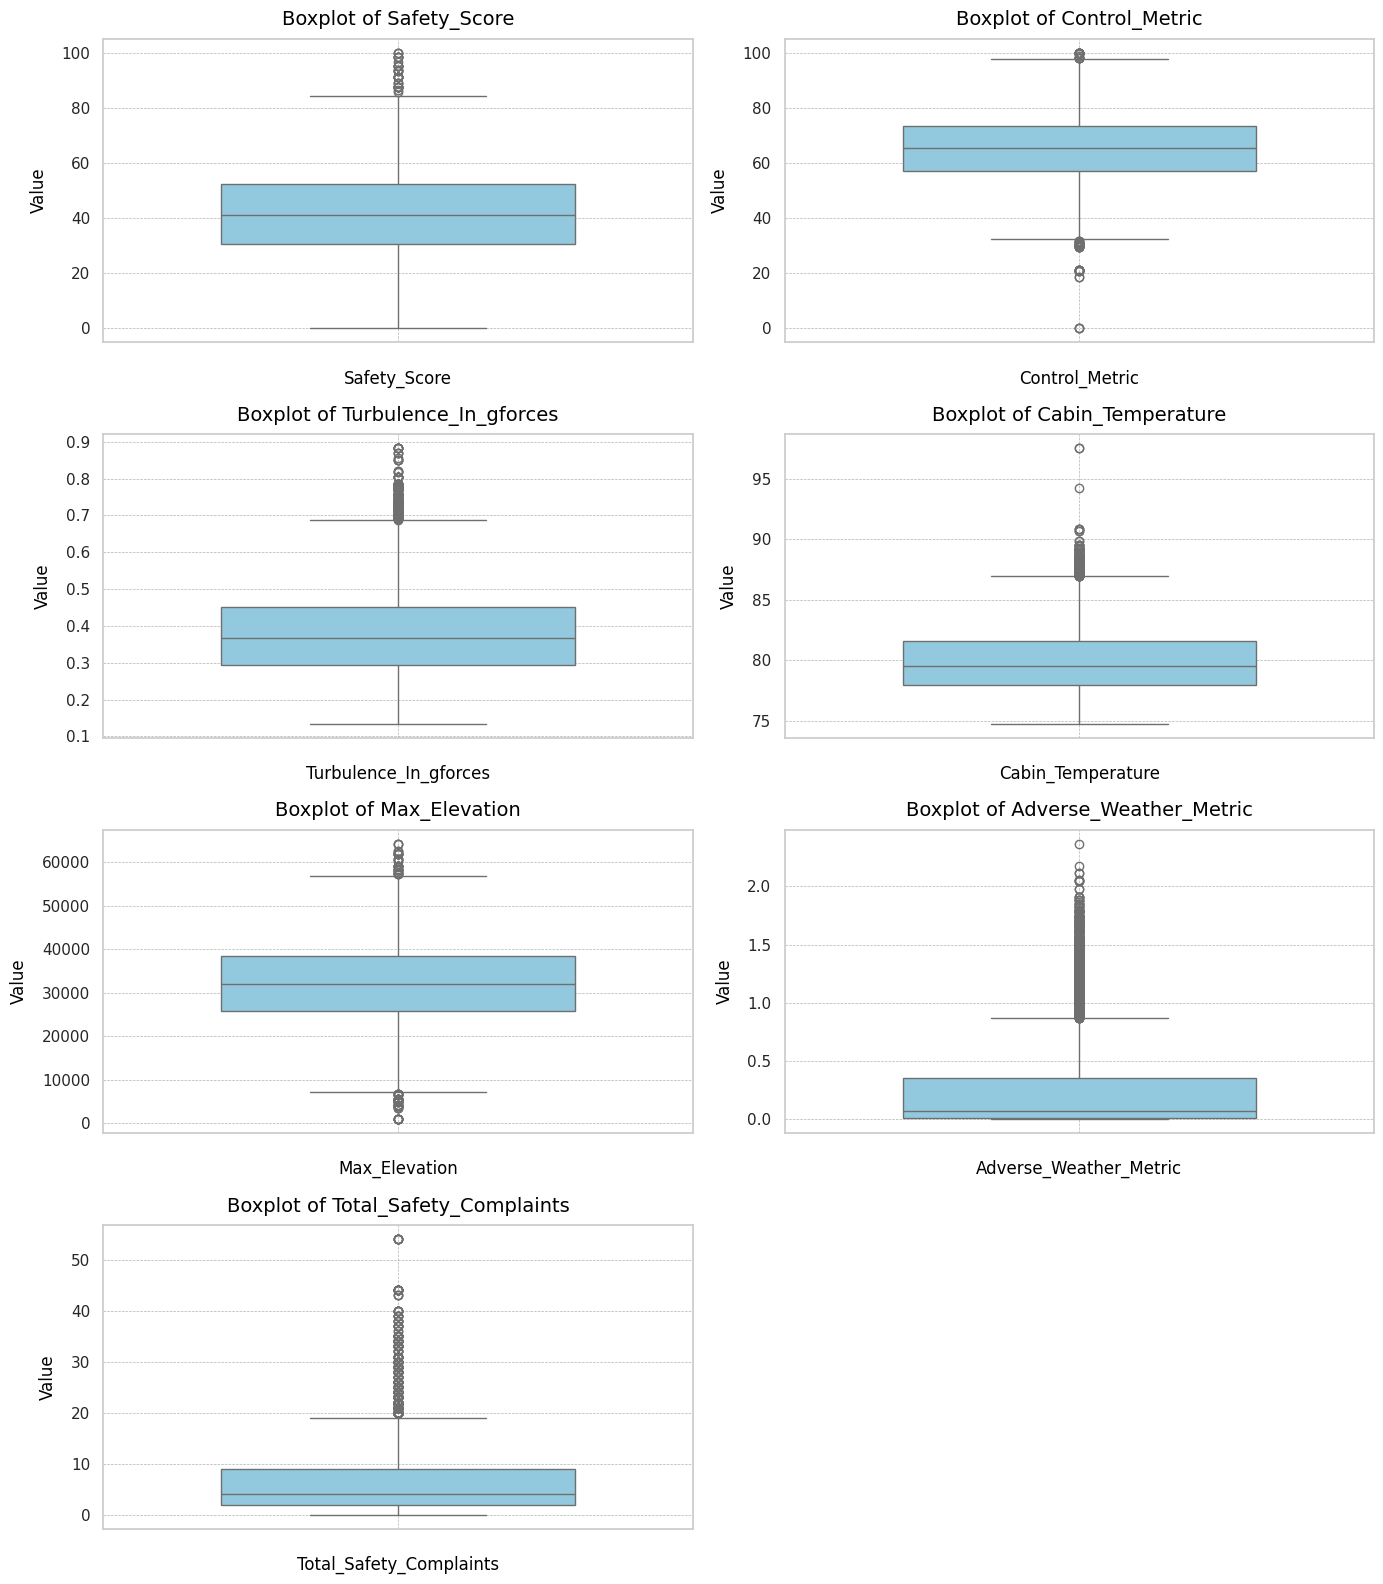

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare numerical data for boxplots
num_df = df_train[['Safety_Score', 'Control_Metric', 'Turbulence_In_gforces',
                   'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric', 'Total_Safety_Complaints']]

# Set the number of rows and columns for the grid
num_cols = 2  # 2 boxplots per row
num_plots = len(num_df.columns)
rows = (num_plots + num_cols - 1) // num_cols  # Calculate required rows

# Create the figure and axes
fig, axes = plt.subplots(rows, num_cols, figsize=(14, rows * 4))  # Adjust size dynamically
axes = axes.flatten()  # Flatten axes array for easier indexing

# Plot each variable as a boxplot
for i, col in enumerate(num_df.columns):
    sns.boxplot(data=num_df[col], color='skyblue', width=0.6, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14, color='black', pad=10)  # Title
    axes[i].set_xlabel(col, fontsize=12, color='black', labelpad=10)  # X-axis label
    axes[i].set_ylabel('Value', fontsize=12, color='black', labelpad=10)  # Y-axis label
    axes[i].grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Grid styling

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()


The primary focus here is to visualize the distribution and detect potential outliers for key numerical variables using boxplots. Boxplots are particularly useful for summarizing the range, interquartile range, median, and identifying outliers in data.

This approach provides a comprehensive visual analysis of numerical data, enabling:

* Identification of outliers that may skew the analysis or modeling.
* Comparison of distributions across different features.
* Quick insights into the data's structure and variability.

As can be seen from boxplots above, the data is prone to a lot of outliers especially variables like 'Total_Safety_Complaints', 'Adverse_Weather_Metric' and 'Turbulence_in_gforces'. Removing them does not make sense as it will lead to a lot of data loss. Let's see if we can improve the situation by transforming these variables

In [ ]:
#Let's map the Dependent variable to their respective categorial dummies
df_train['Severity']= df_train.Severity.map({'Minor_Damage_And_Injuries': '1', 'Significant_Damage_And_Fatalities': '2', 'Significant_Damage_And_Serious_Injuries': '3', 'Highly_Fatal_And_Damaging': '4'})
df_train.head()

Severity  Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0        1     49.223744                     14                       22   
1        1     62.465753                     10                       27   
2        2     63.059361                     13                       16   
3        3     48.082192                     11                        9   
4        2     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       71.285324               0.272118              78.04   
1       72.288058               0.423939              84.54   
2       66.362808               0.322604              78.86   
3       74.703737               0.337029              81.79   
4       47.948952               0.541140              77.16   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
0                   2    31335.47682           3                0.424352  
1                   2    26024.71106           2                0.352350  
2                   7    39269.05393           3                0.003364  
3                   3    42771.49920           1                0.211728  
4                   3    35509.22852           2                0.176883

The dependent variable Severity is mapped to categorical dummy values to streamline analysis and ensure consistent representation. The mapping is as follows:

* 'Minor_Damage_And_Injuries' → '1'
* 'Significant_Damage_And_Fatalities' → '2'
* 'Significant_Damage_And_Serious_Injuries' → '3'
* 'Highly_Fatal_And_Damaging' → '4'

This transformation converts descriptive labels into numeric representations, simplifying visualization and modeling tasks.

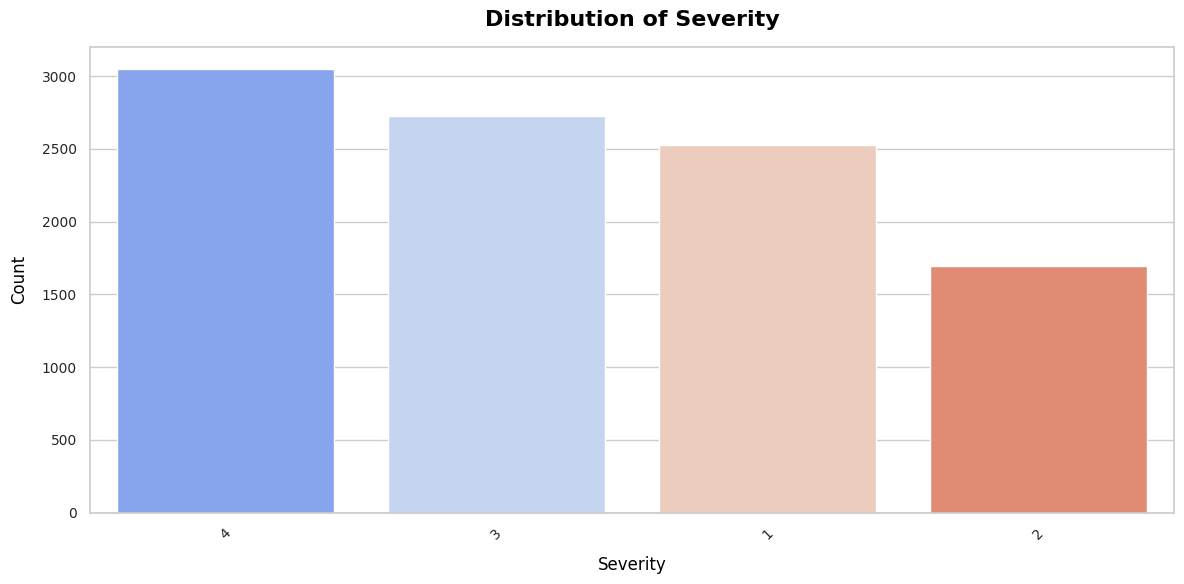

In [ ]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Define the figure and axes with a specific size
fig, ax = plt.subplots(figsize=(12, 6))

# Create the count plot
sns.countplot(
    data=df_train,
    x='Severity',
    palette='coolwarm',
    order=df_train['Severity'].value_counts().index,  # Sort by frequency
    saturation=0.8,
    ax=ax  # Use the defined axis
)

# Add a title and labels
ax.set_title('Distribution of Severity', fontsize=16, fontweight='bold', pad=15, color='black')
ax.set_xlabel('Severity', fontsize=12, labelpad=10, color='black')
ax.set_ylabel('Count', fontsize=12, labelpad=10, color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
ax.tick_params(axis='y', labelsize=10)

# Adjust layout to remove extra space
fig.tight_layout()

# Display the plot
plt.show()


**Insights from the Plot**

* The count plot provides a clear view of how the data is distributed across the four severity categories.
* It highlights potential class imbalances, which are crucial to address in subsequent modeling steps, particularly for classification problems.

### **Distributions of Variables**

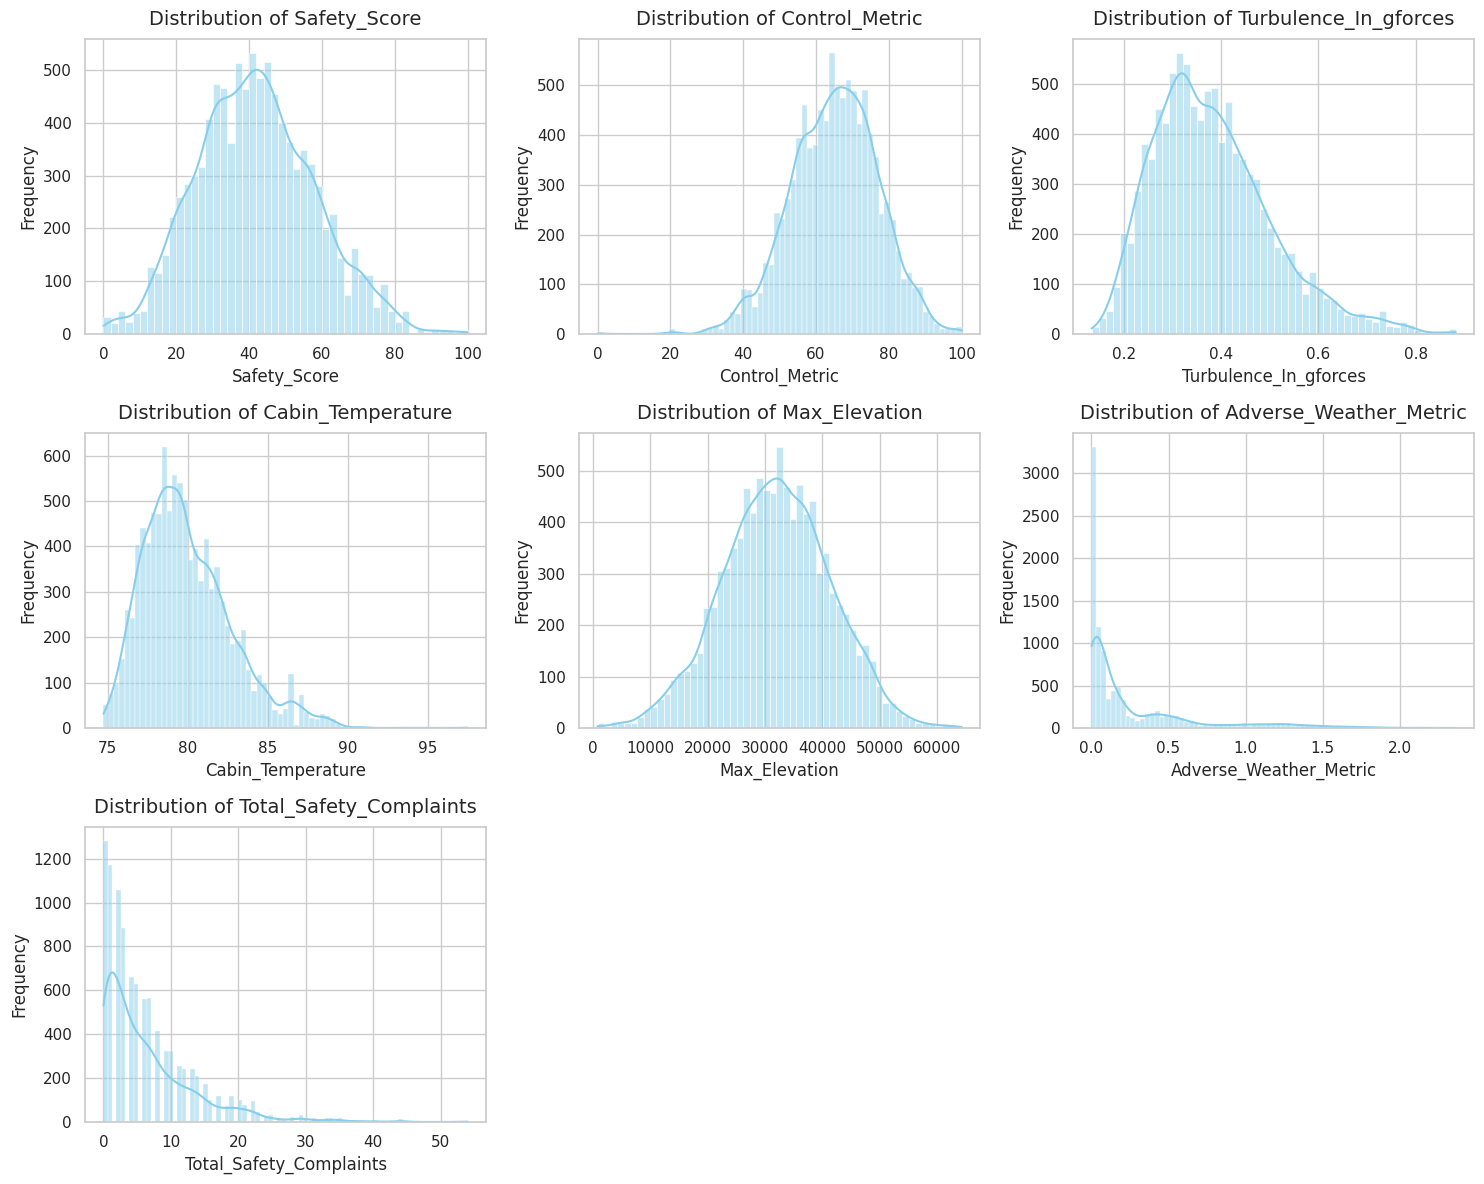

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of variables and create subplots
num_vars = num_df.columns
num_plots = len(num_vars)
rows = (num_plots + 2) // 3  # Arrange in a grid with 3 columns per row
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Adjust size dynamically
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Set a consistent theme
sns.set_theme(style="whitegrid")

# Plot each variable in its respective subplot
for i, var in enumerate(num_vars):
    sns.histplot(num_df[var], kde=True, color="skyblue", ax=axes[i])  # Use histplot with KDE
    axes[i].set_title(f"Distribution of {var}", fontsize=14, pad=10)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to remove unwanted spaces
plt.tight_layout()

# Show the plot
plt.show()


### **Handling Skewness**

Skewed distributions can adversely affect machine learning models by violating the assumptions of normality in some algorithms. To address this, specific transformations are applied to normalize the data.

**Initial Visualization**
Histograms with KDE:
* Each numerical variable is plotted using sns.histplot() with KDE (Kernel Density Estimate) overlays to observe the data distribution.
* Left Skew: Variables like Control_Metric show a distribution with a longer tail on the left.
* Right Skew: Variables such as Cabin_Temperature, Total_Safety_Complaints, Adverse_Weather_Metric, and Turbulence_In_gforces have distributions with a longer tail on the right.

In [ ]:
#Fixing the right skew
num_df['Total_Safety_Complaints'] = np.log(num_df['Total_Safety_Complaints']+1) #+1 cause the log here takes a negative value
num_df['Adverse_Weather_Metric'] = np.log(num_df['Adverse_Weather_Metric'])
num_df['Cabin_Temperature'] = np.log(num_df['Cabin_Temperature'])
num_df['Turbulence_In_gforces'] = np.log(num_df['Turbulence_In_gforces'])

#Fixing left skew
num_df['Control_Metric'] = np.power(num_df['Control_Metric'], 2)

**Transformation of Skewed Variables**

To normalize the distributions:

**Right-Skewed Variables:**

Log transformations are applied using np.log(), which compresses the right tail and spreads out values near zero.
Variables Transformed:
* Total_Safety_Complaints (added +1 to avoid logarithm of zero).
* Adverse_Weather_Metric
* Cabin_Temperature
* Turbulence_In_gforces

**Left-Skewed Variable:**

A power transformation is applied to Control_Metric by squaring the values (np.power(x, 2)) to correct the skewness.

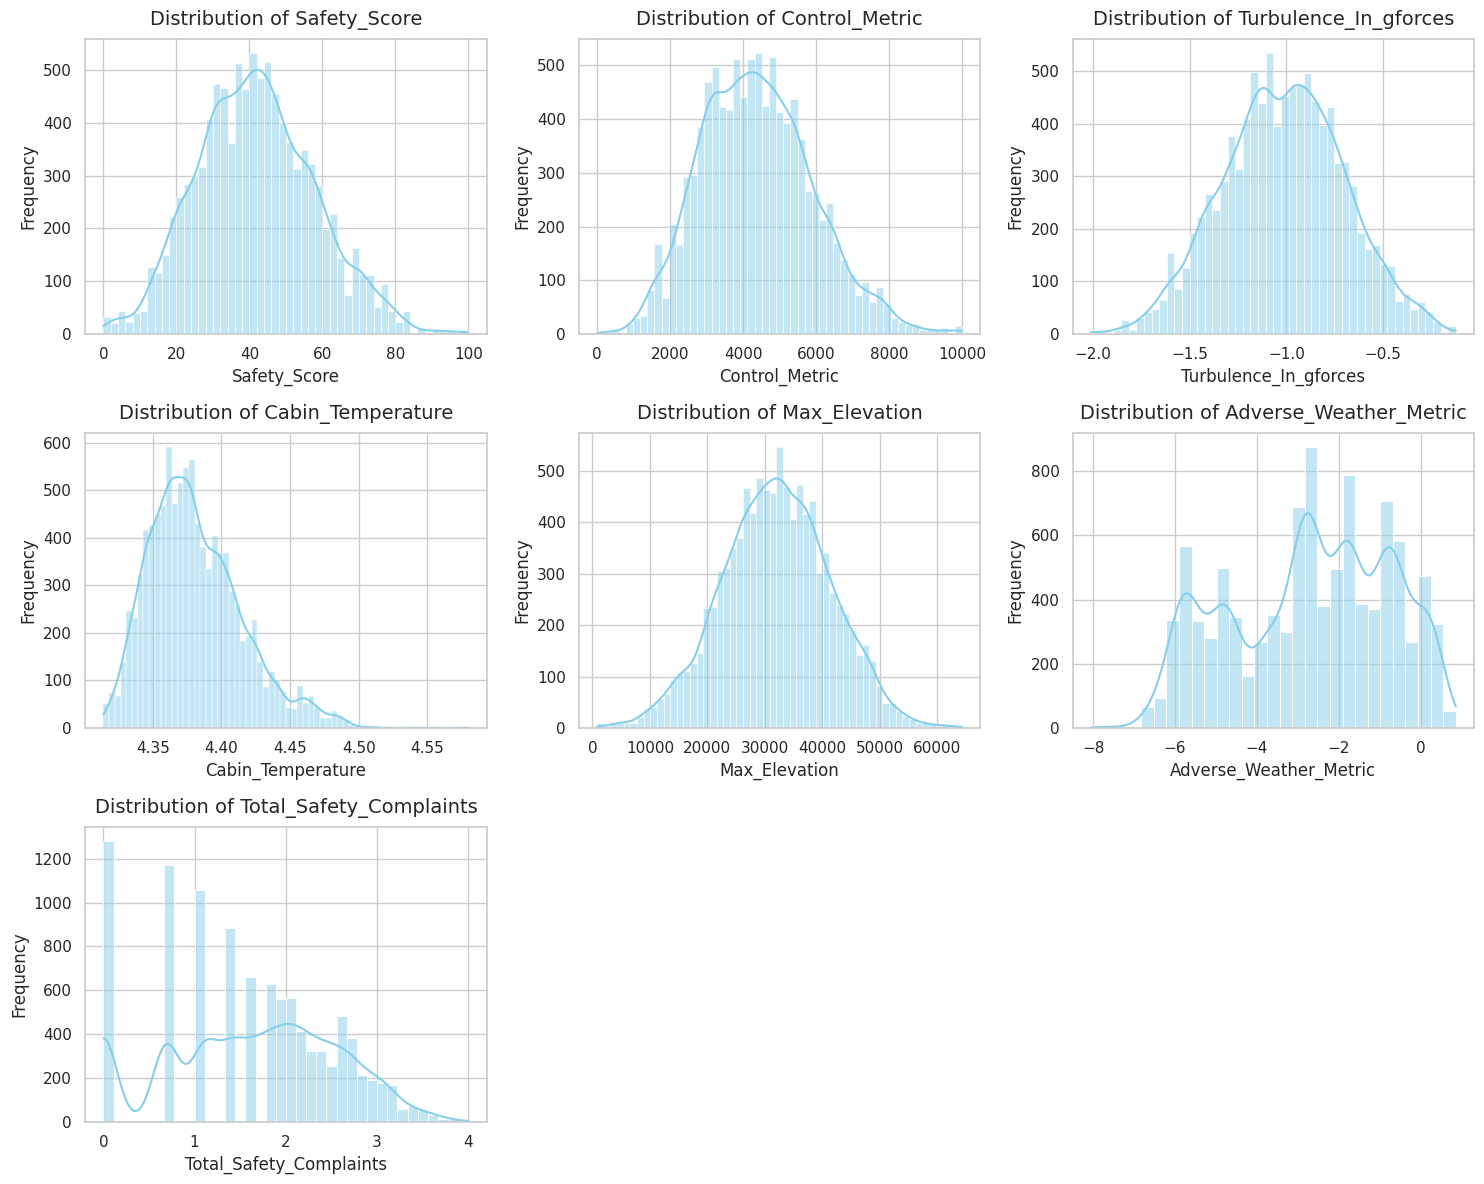

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of variables and create subplots
num_vars = num_df.columns
num_plots = len(num_vars)
rows = (num_plots + 2) // 3  # Arrange in a grid with 3 columns per row
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  # Adjust size dynamically
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Set a consistent theme
sns.set_theme(style="whitegrid")

# Plot each variable in its respective subplot
for i, var in enumerate(num_vars):
    sns.histplot(num_df[var], kde=True, color="skyblue", ax=axes[i])  # Use histplot with KDE
    axes[i].set_title(f"Distribution of {var}", fontsize=14, pad=10)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to remove unwanted spaces
plt.tight_layout()

# Show the plot
plt.show()


**Post-Transformation Visualization**

The histograms are re-plotted after the transformations:
* Variables previously skewed to the right exhibit more symmetrical distributions post log transformation.
* Control_Metric no longer shows left skewness after the power transformation.

**Advantages of Transformation**
* Improved Model Performance:
  * Normalized distributions help in reducing model bias and variance.
  * Algorithms sensitive to distribution perform better with transformed data.
* Enhanced Interpretability:
  * Correcting skewness ensures that summary statistics like mean and standard deviation better represent the data.

### **Feature Correlations**

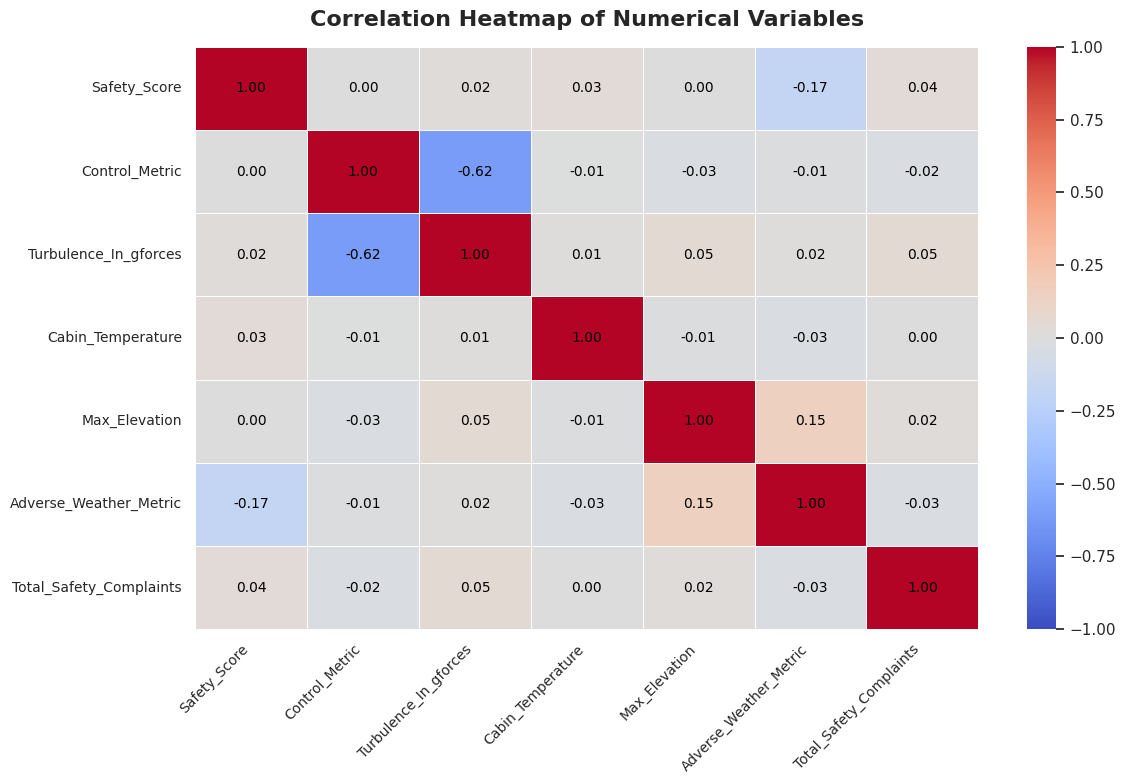

In [ ]:
# Calculate the correlation matrix
correlation = num_df.corr()

# Create a heatmap with better styling
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.set_theme(style="white")  # Use a clean white background theme

# Create the heatmap
heatmap = sns.heatmap(
    correlation,
    annot=True,  # Annotate each cell with the correlation value
    fmt=".2f",  # Format the numbers to 2 decimal places
    cmap="coolwarm",  # Use a color palette
    vmin=-1, vmax=1,  # Ensure the color range is consistent
    linewidths=0.5,  # Add thin lines between cells
    annot_kws={"size": 10, "color": "black"}  # Customize annotations
)

# Add title and labels
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16, fontweight='bold', pad=15)
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10, rotation=0)  # Keep y-axis labels horizontal

# Remove extra spaces and display
plt.tight_layout()
plt.show()

No variables show worrying levels of correlation to each other except 'Control_Metric' and 'Turbulence_In_gforces'. However, keeping them in the model yielded better results. Also, 0.6 is more closer to 0.5 than any extreme so i decided to keep them.

In [ ]:
#Let's put the entire dataset back together
Rem= df_train[['Days_Since_Inspection','Violations','Accident_Type_Code','Severity']]
train2= pd.concat([num_df, Rem], axis=1)
train2.head()

Safety_Score  Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0     49.223744     5081.597362              -1.301521           4.357222   
1     62.465753     5225.563379              -0.858166           4.437225   
2     63.059361     4404.022241              -1.131328           4.367674   
3     48.082192     5580.648392              -1.087586           4.404155   
4     26.484018     2299.101968              -0.614077           4.345881   

   Max_Elevation  Adverse_Weather_Metric  Total_Safety_Complaints  \
0    31335.47682               -0.857192                 3.135494   
1    26024.71106               -1.043130                 3.332205   
2    39269.05393               -5.694652                 2.833213   
3    42771.49920               -1.552452                 2.302585   
4    35509.22852               -1.732265                 3.258097   

   Days_Since_Inspection  Violations  Accident_Type_Code Severity  
0                     14           3                   2        1  
1                     10           2                   2        1  
2                     13           3                   7        2  
3                     11           1                   3        3  
4                     13           2                   3        2

## **Bivariate analysis**
1. Comparises more than one attribute in a graph.
2. Visualization of graph.
3. Uncover hidden pattern and relation between the attributes.

Here we describe which attribute is Categorical and Quantitative:

**Categorical:**

1.  `Violations`.

2.  `Accident_Type_Code`.

3.  `Days_Since_Inspection`.

4.  **Target Variable**: `Severity`



**Quantitative:**

1.  `Adverse_Weather_Metric`

2.  `Max_Elevation`

3.  `Cabin_Temperature`

4.  `Turbulence_In_gforces`

5.  `Control_Metric`

6.  `Total_Safety_Complaints`

7.  `Safety_Score`


### Compare both Categorical and Quantitative attributes together.

#### 1.  `Adverse_Weather_Metric`

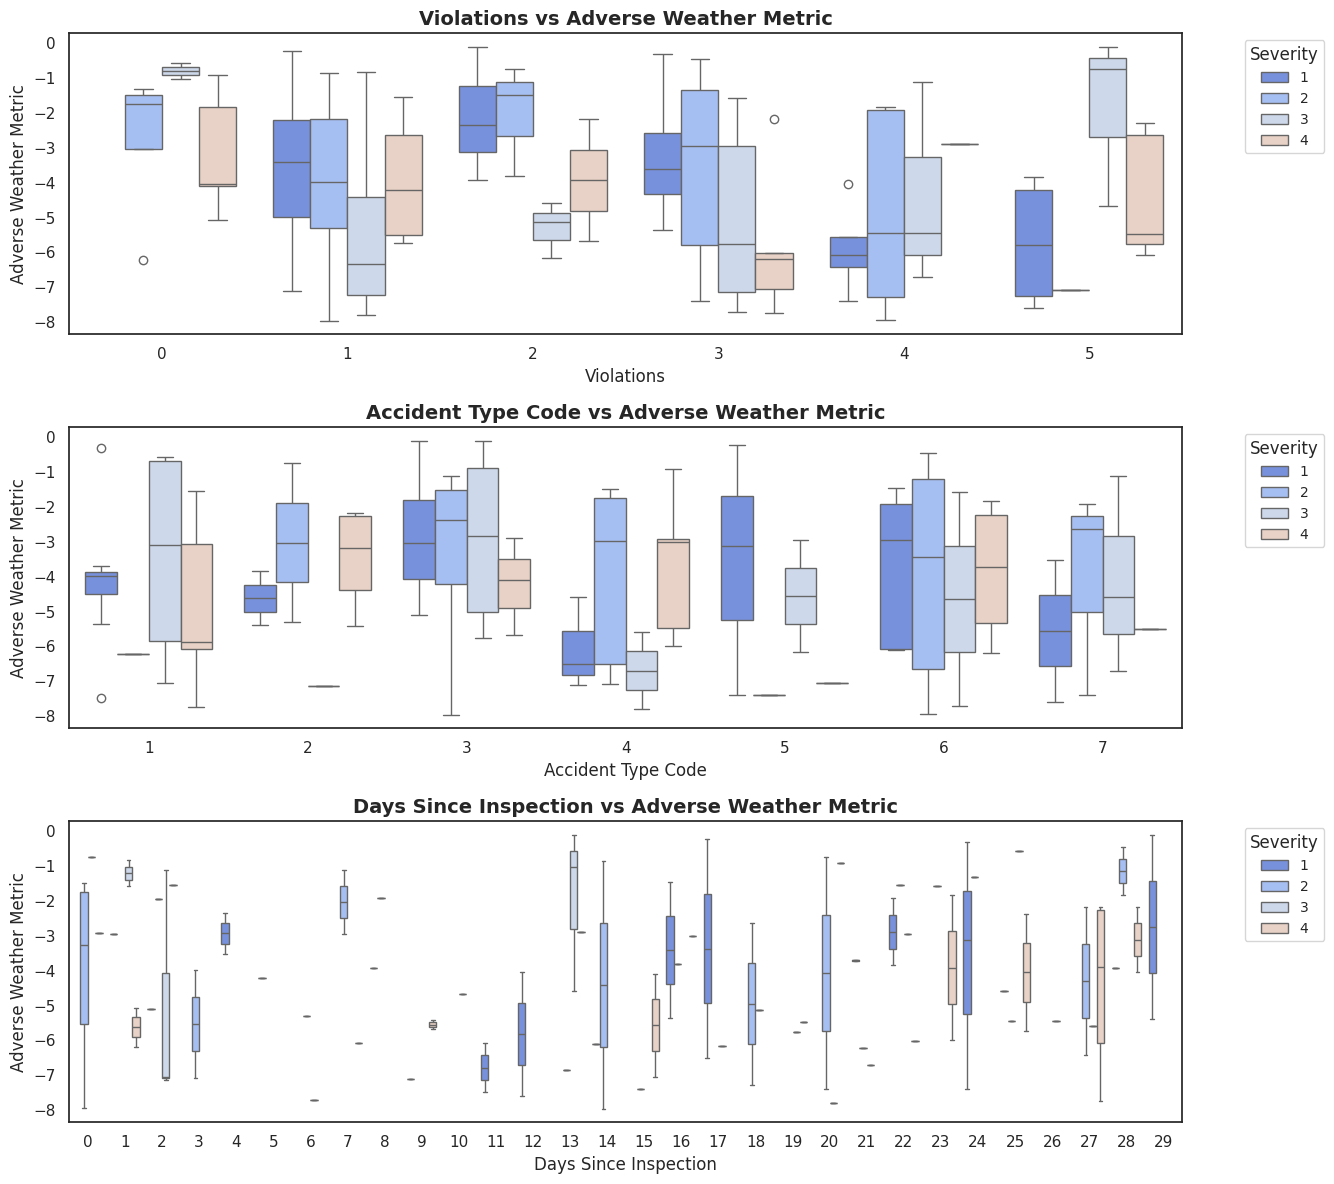

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Simulating train2 dataset for demonstration
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Adverse_Weather_Metric': np.random.uniform(-8, 0, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the boxplot code with better alignment, professional styling, and legends on the right
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette for better aesthetics
custom_palette = sns.color_palette("coolwarm")

# Plot 1: Violations vs Adverse Weather Metric
sns.boxplot(
    ax=axes[0],
    x='Violations',
    y='Adverse_Weather_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Adverse Weather Metric', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Adverse Weather Metric', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Adverse Weather Metric
sns.boxplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Adverse_Weather_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Adverse Weather Metric', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Adverse Weather Metric', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Adverse Weather Metric
sns.boxplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Adverse_Weather_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Adverse Weather Metric', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Adverse Weather Metric', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for improved alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


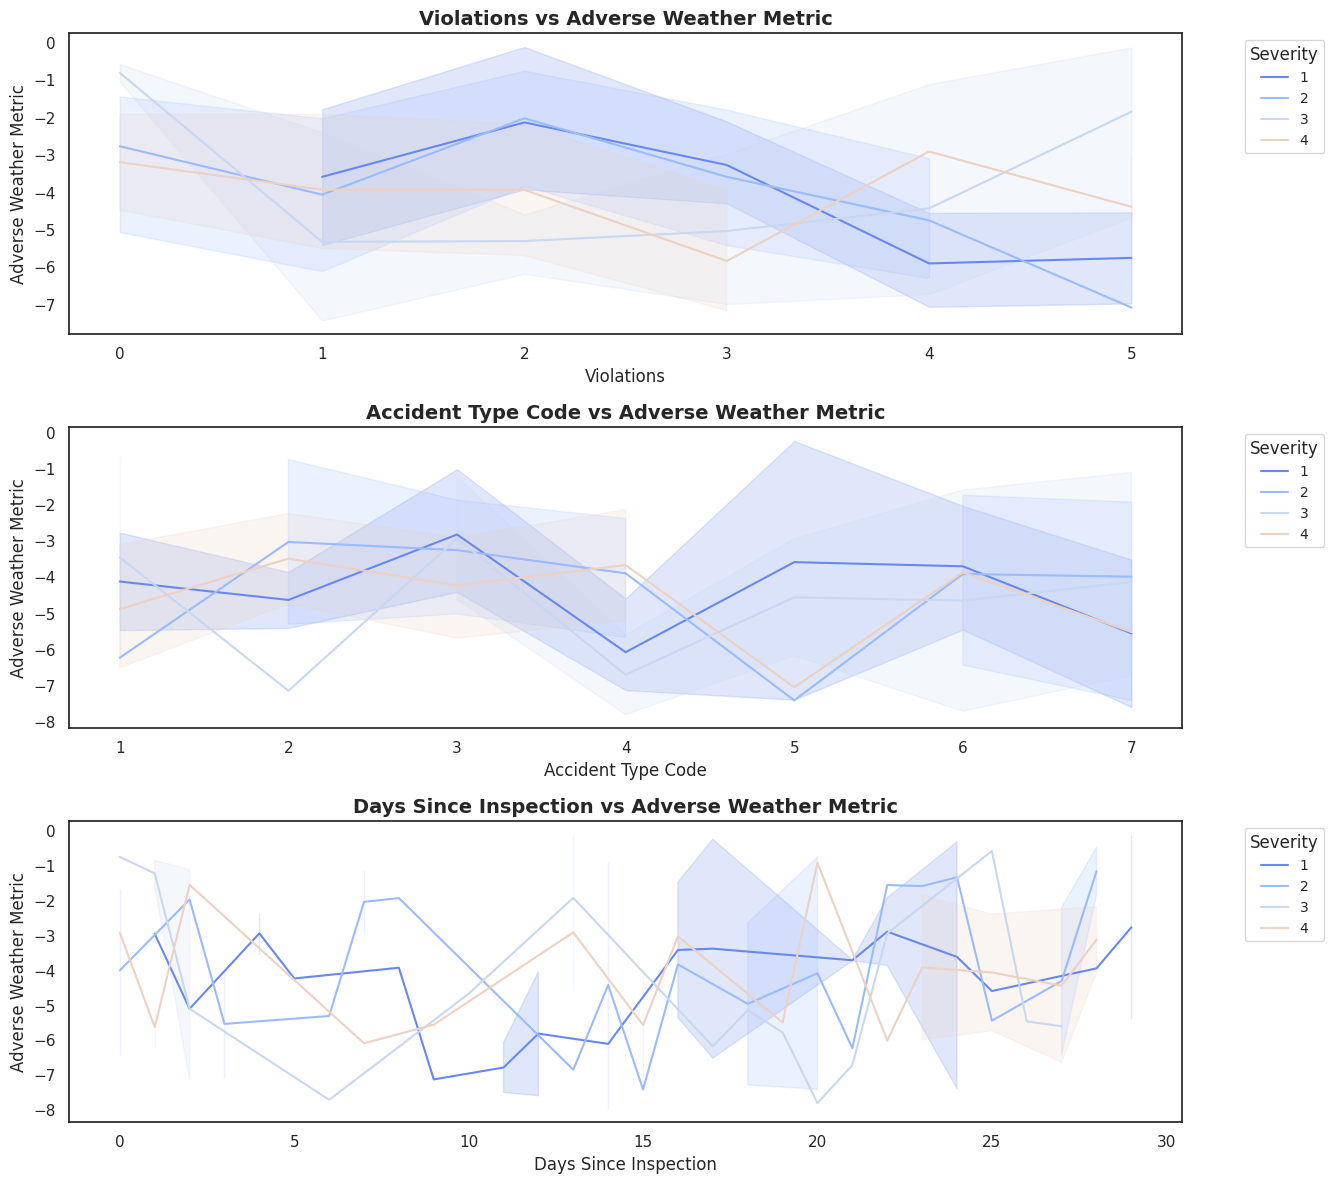

In [ ]:
# Simulating train2 dataset for demonstration
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Adverse_Weather_Metric': np.random.uniform(-8, 0, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the line plot code with better alignment and legends
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette for better aesthetics
custom_palette = sns.color_palette("coolwarm")

# Plot 1: Violations vs Adverse Weather Metric
sns.lineplot(
    ax=axes[0],
    x='Violations',
    y='Adverse_Weather_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Adverse Weather Metric', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Adverse Weather Metric', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Adverse Weather Metric
sns.lineplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Adverse_Weather_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Adverse Weather Metric', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Adverse Weather Metric', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Adverse Weather Metric
sns.lineplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Adverse_Weather_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Adverse Weather Metric', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Adverse Weather Metric', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for improved alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


#### 2. `Max_Elevation`

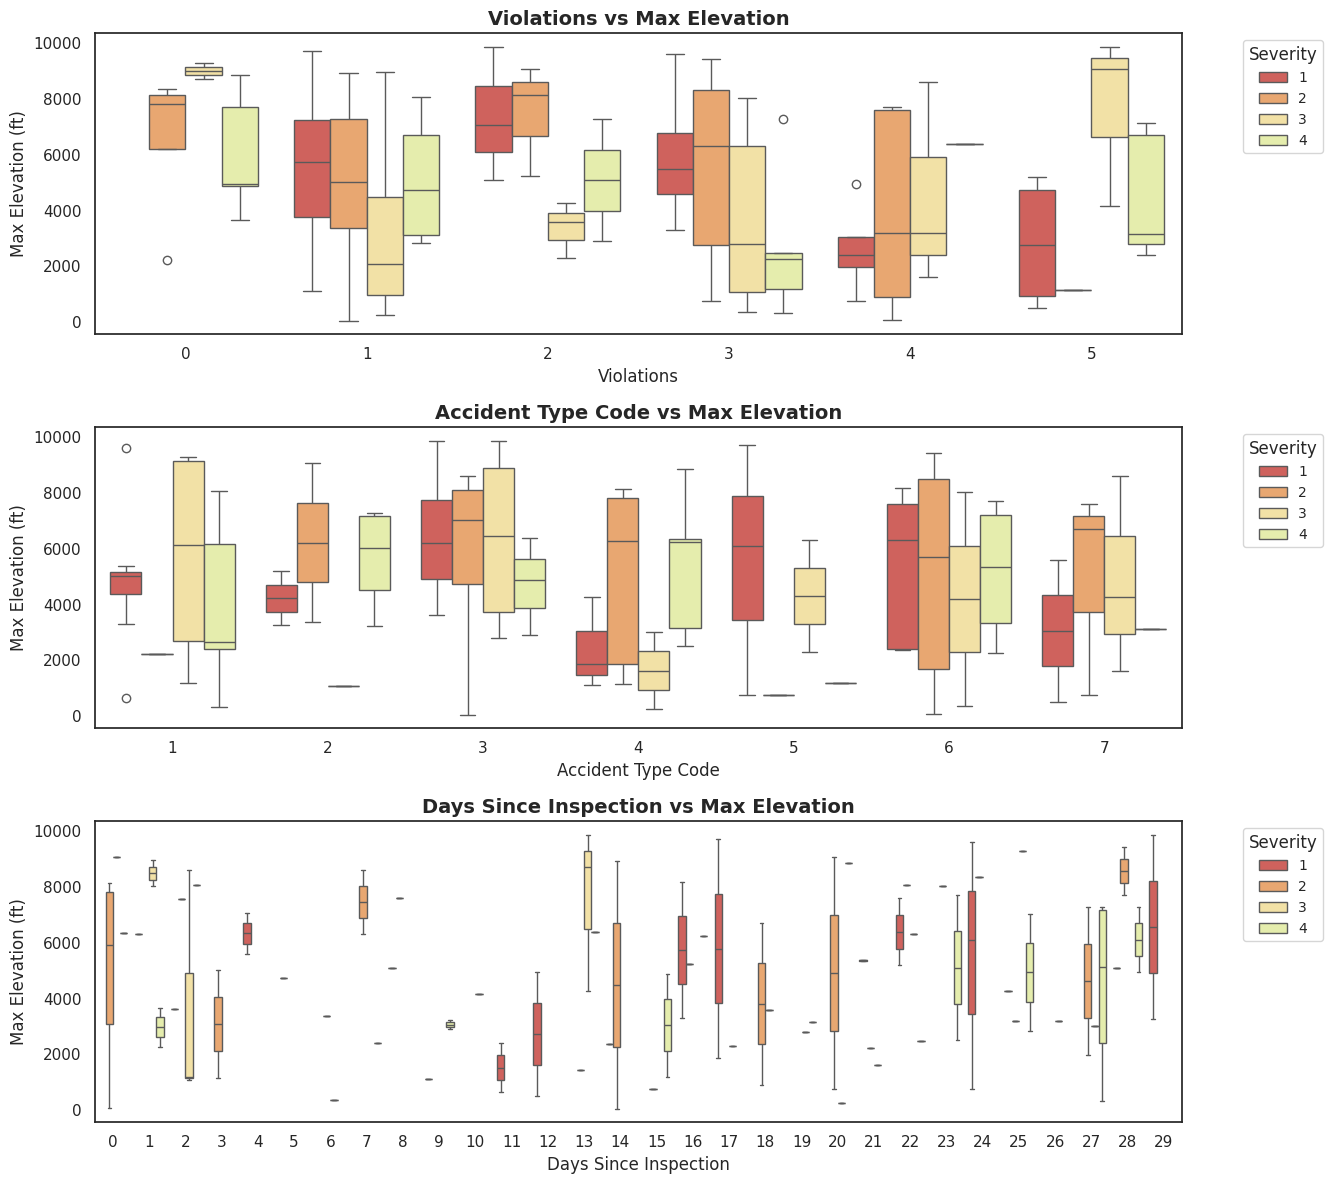

In [ ]:
# Simulating train2 dataset for demonstration
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Max_Elevation': np.random.uniform(0, 10000, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the boxplot code
fig, axes = plt.subplots(3, 1, figsize=(14,12))

# Custom color palette
custom_palette = sns.color_palette("Spectral")

# Plot 1: Violations vs Max Elevation
sns.boxplot(
    ax=axes[0],
    x='Violations',
    y='Max_Elevation',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Max Elevation', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Max Elevation (ft)', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Max Elevation
sns.boxplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Max_Elevation',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Max Elevation', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Max Elevation (ft)', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Max Elevation
sns.boxplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Max_Elevation',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Max Elevation', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Max Elevation (ft)', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjust layout for better alignment
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()

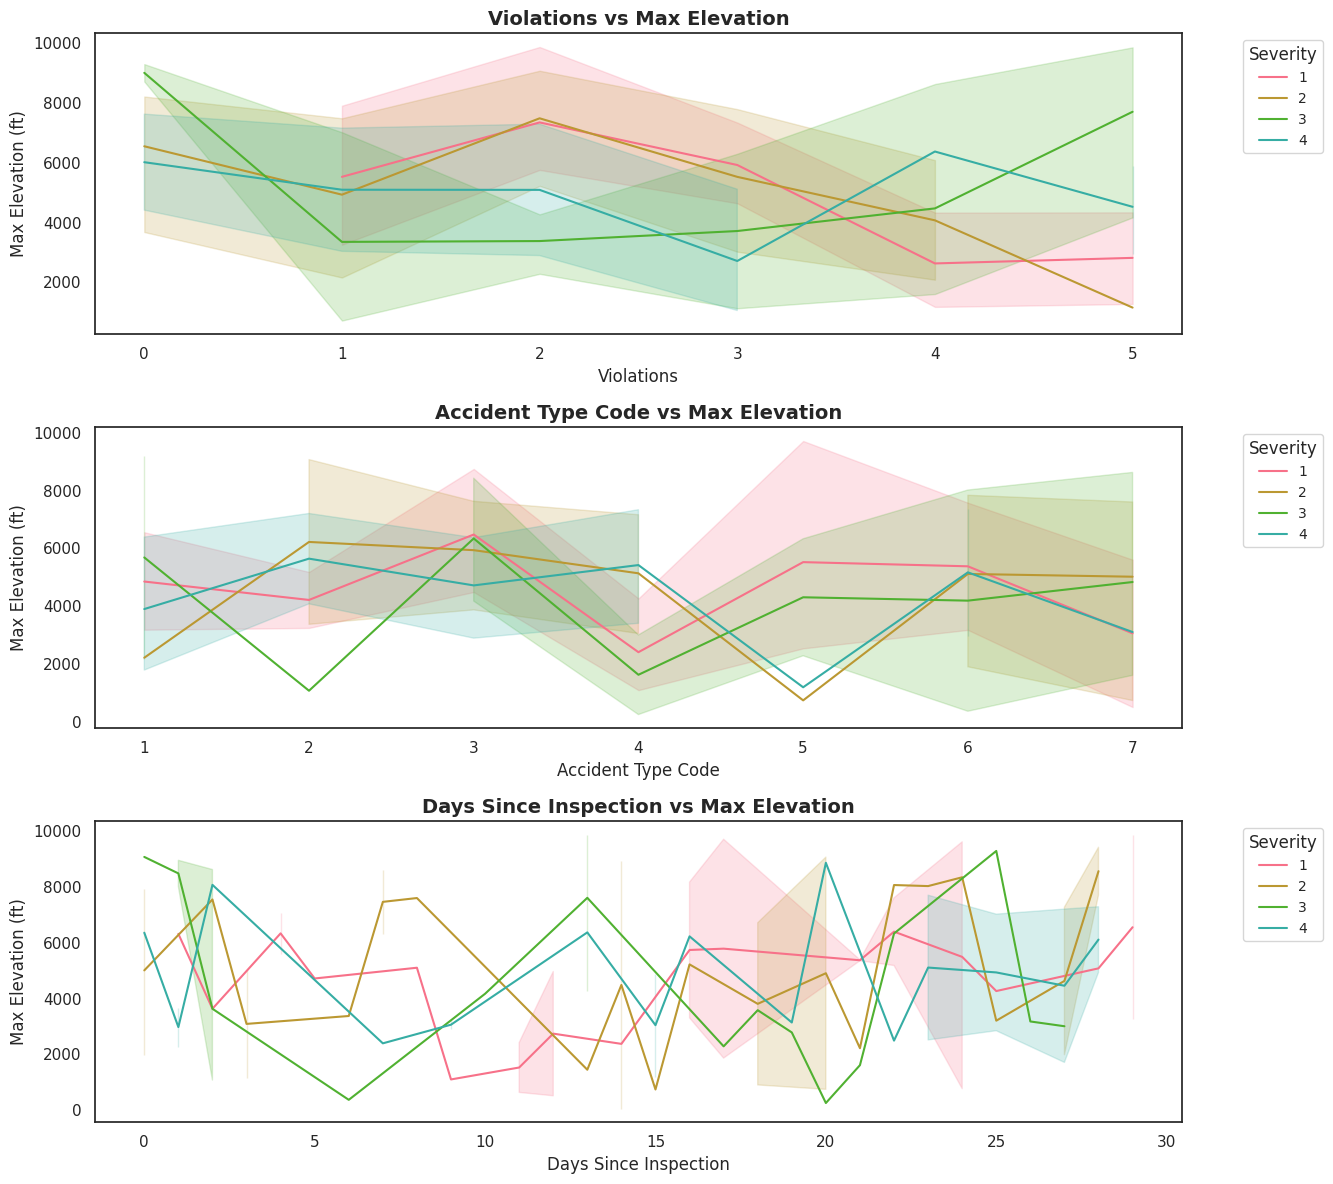

In [ ]:
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Max_Elevation': np.random.uniform(0, 10000, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the line plot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette for professional visuals
custom_palette = sns.color_palette("husl")

# Plot 1: Violations vs Max Elevation
sns.lineplot(
    ax=axes[0],
    x='Violations',
    y='Max_Elevation',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Max Elevation', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Max Elevation (ft)', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Max Elevation
sns.lineplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Max_Elevation',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Max Elevation', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Max Elevation (ft)', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Max Elevation
sns.lineplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Max_Elevation',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Max Elevation', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Max Elevation (ft)', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjust layout for better spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


#### 3. `Cabin_Temperature`

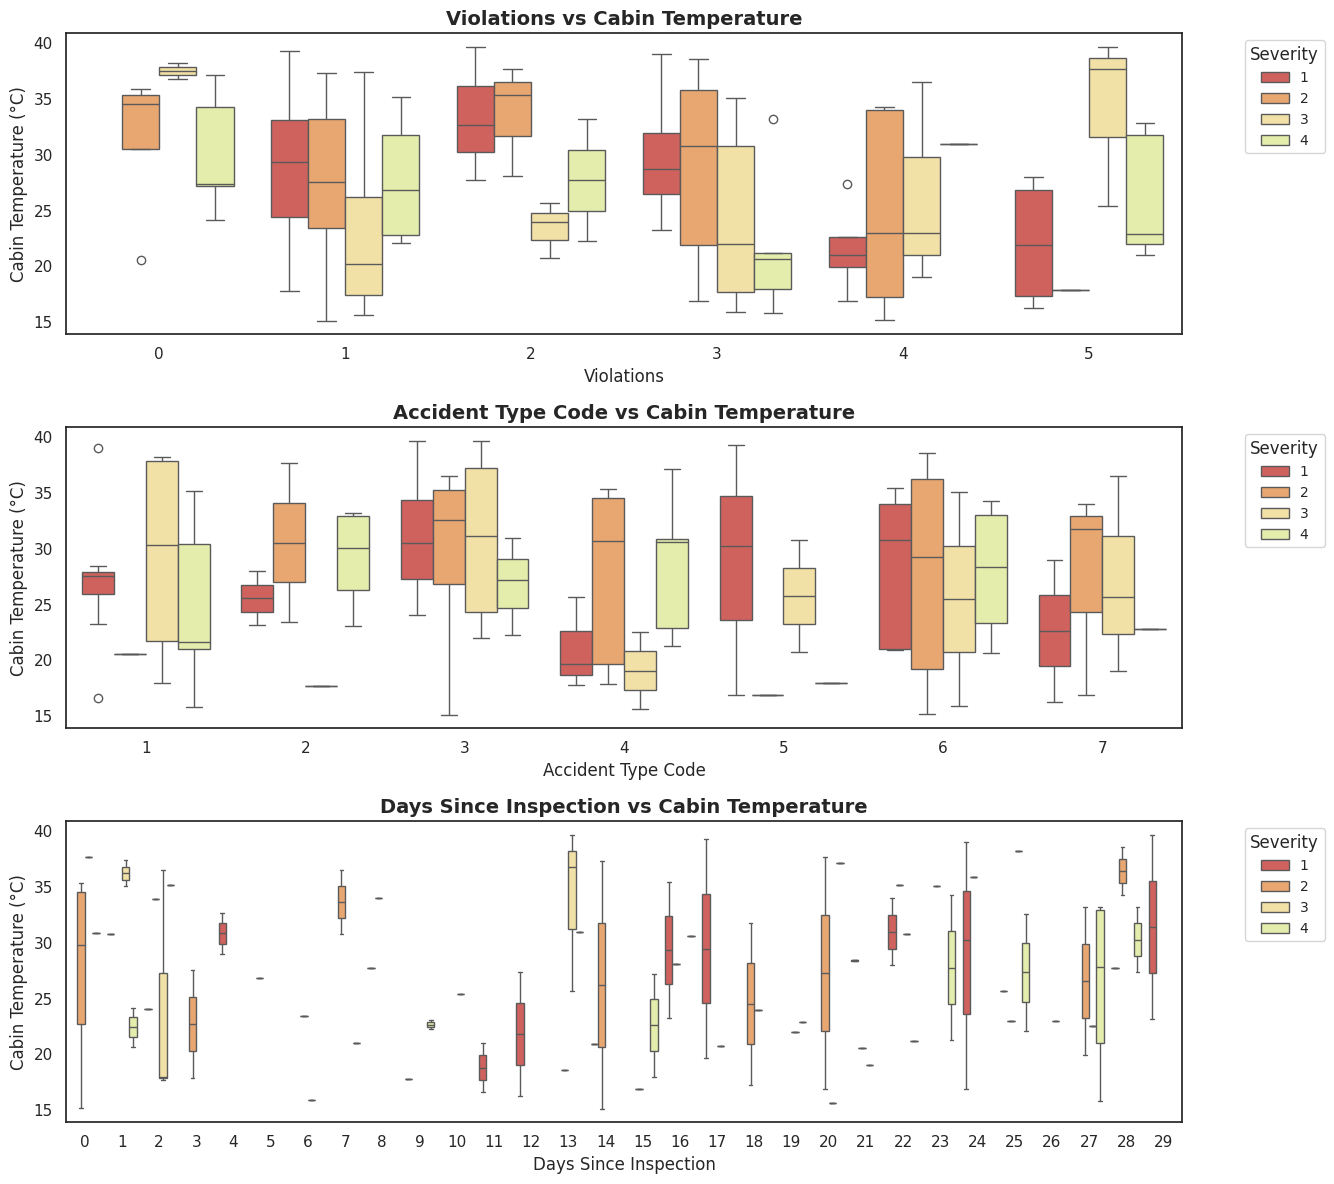

In [ ]:
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Cabin_Temperature': np.random.uniform(15, 40, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the boxplot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette
custom_palette = sns.color_palette("Spectral")

# Plot 1: Violations vs Cabin Temperature
sns.boxplot(
    ax=axes[0],
    x='Violations',
    y='Cabin_Temperature',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Cabin Temperature', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Cabin Temperature (°C)', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Cabin Temperature
sns.boxplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Cabin_Temperature',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Cabin Temperature', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Cabin Temperature (°C)', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Cabin Temperature
sns.boxplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Cabin_Temperature',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Cabin Temperature', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Cabin Temperature (°C)', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


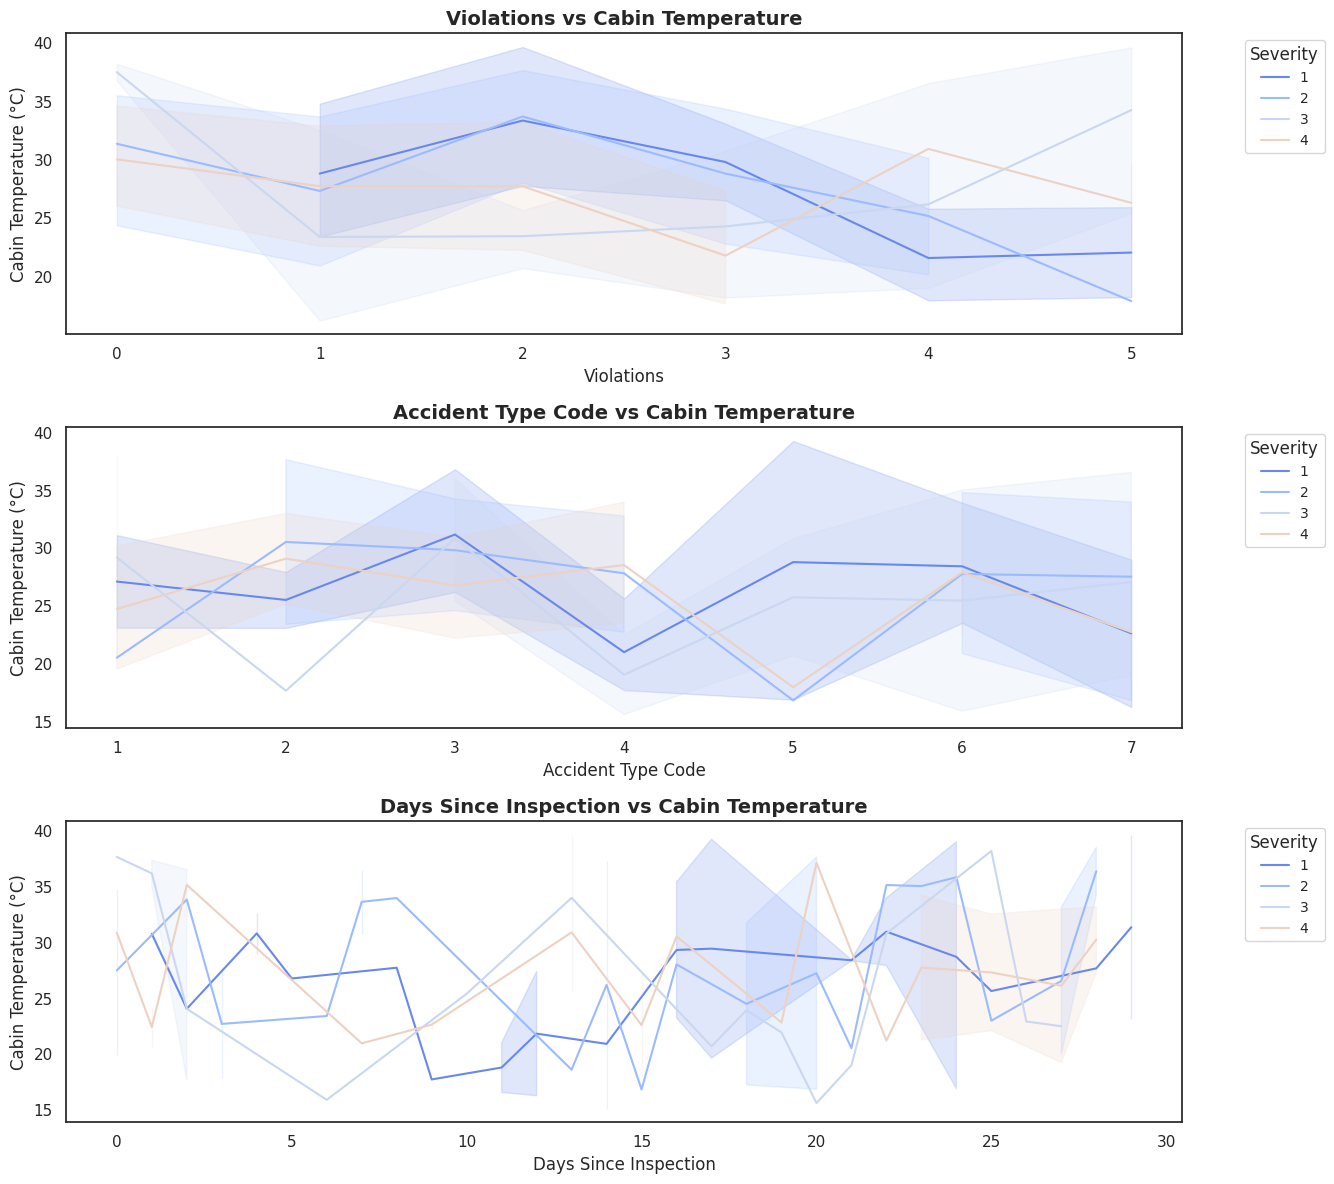

In [ ]:
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Cabin_Temperature': np.random.uniform(15, 40, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the line plot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette
custom_palette = sns.color_palette("coolwarm")

# Plot 1: Violations vs Cabin Temperature
sns.lineplot(
    ax=axes[0],
    x='Violations',
    y='Cabin_Temperature',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Cabin Temperature', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Cabin Temperature (°C)', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Cabin Temperature
sns.lineplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Cabin_Temperature',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Cabin Temperature', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Cabin Temperature (°C)', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Cabin Temperature
sns.lineplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Cabin_Temperature',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Cabin Temperature', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Cabin Temperature (°C)', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


#### 4. `Turbulence_In_gforces`

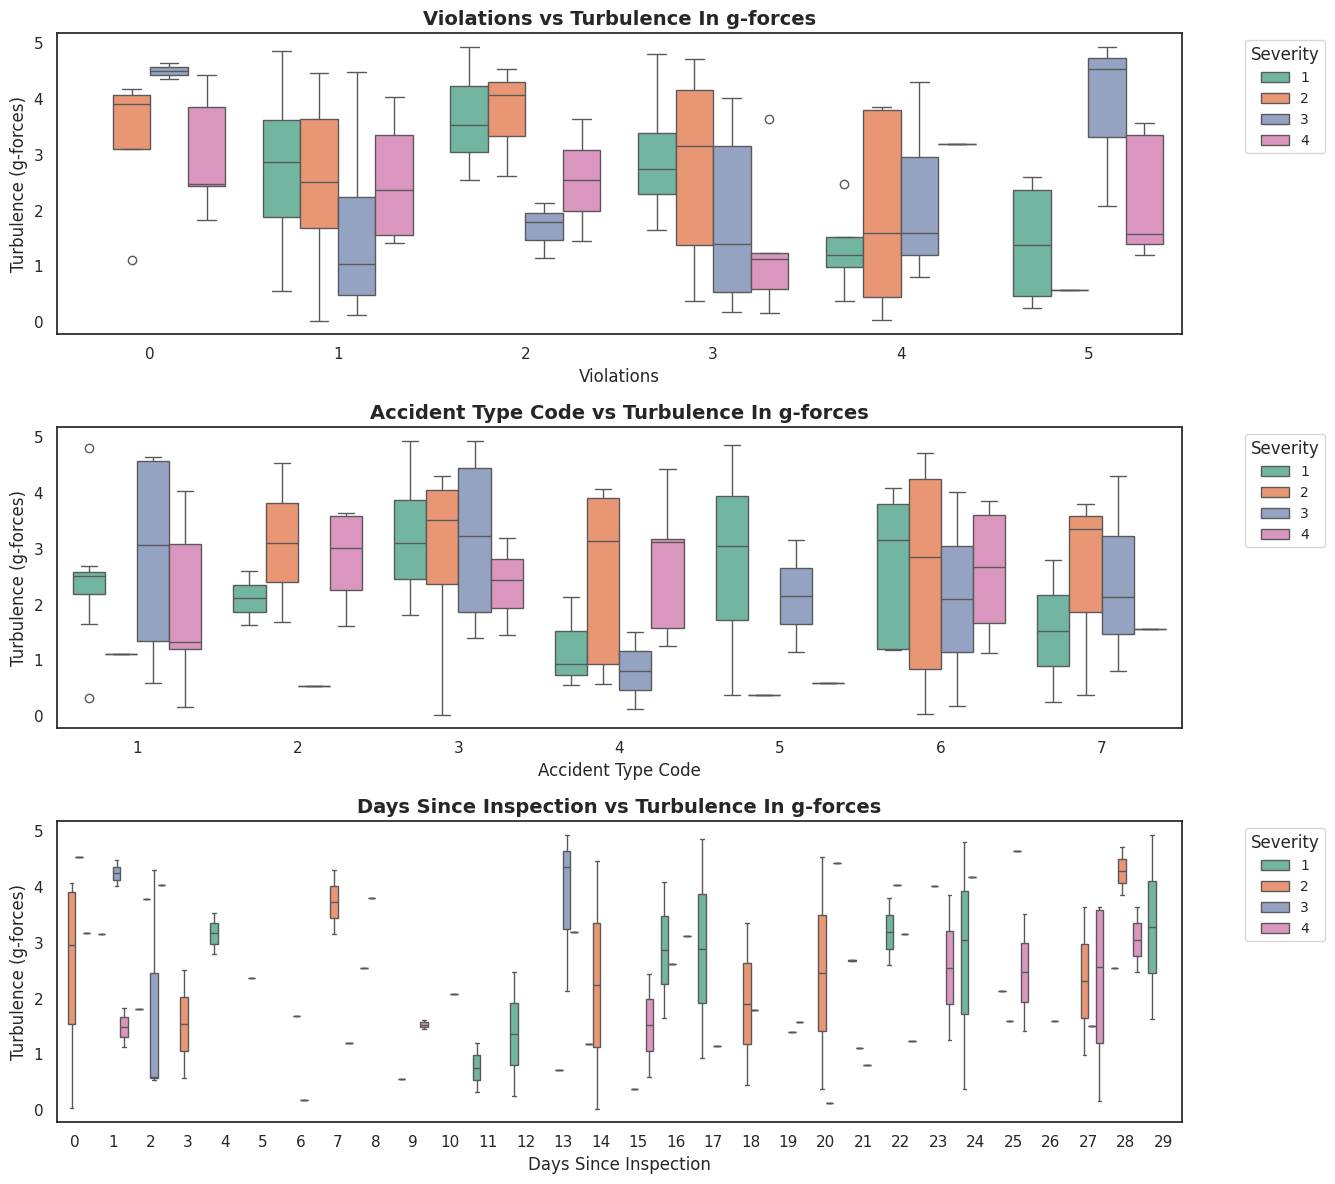

In [ ]:
# Simulating train2 dataset for demonstration
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Turbulence_In_gforces': np.random.uniform(0, 5, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the boxplot code
fig, axes = plt.subplots(3, 1, figsize=(14, 1))

# Custom color palette
custom_palette = sns.color_palette("Set2")

# Plot 1: Violations vs Turbulence In g-forces
sns.boxplot(
    ax=axes[0],
    x='Violations',
    y='Turbulence_In_gforces',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Turbulence In g-forces', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Turbulence (g-forces)', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Turbulence In g-forces
sns.boxplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Turbulence_In_gforces',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Turbulence In g-forces', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Turbulence (g-forces)', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Turbulence In g-forces
sns.boxplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Turbulence_In_gforces',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Turbulence In g-forces', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Turbulence (g-forces)', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


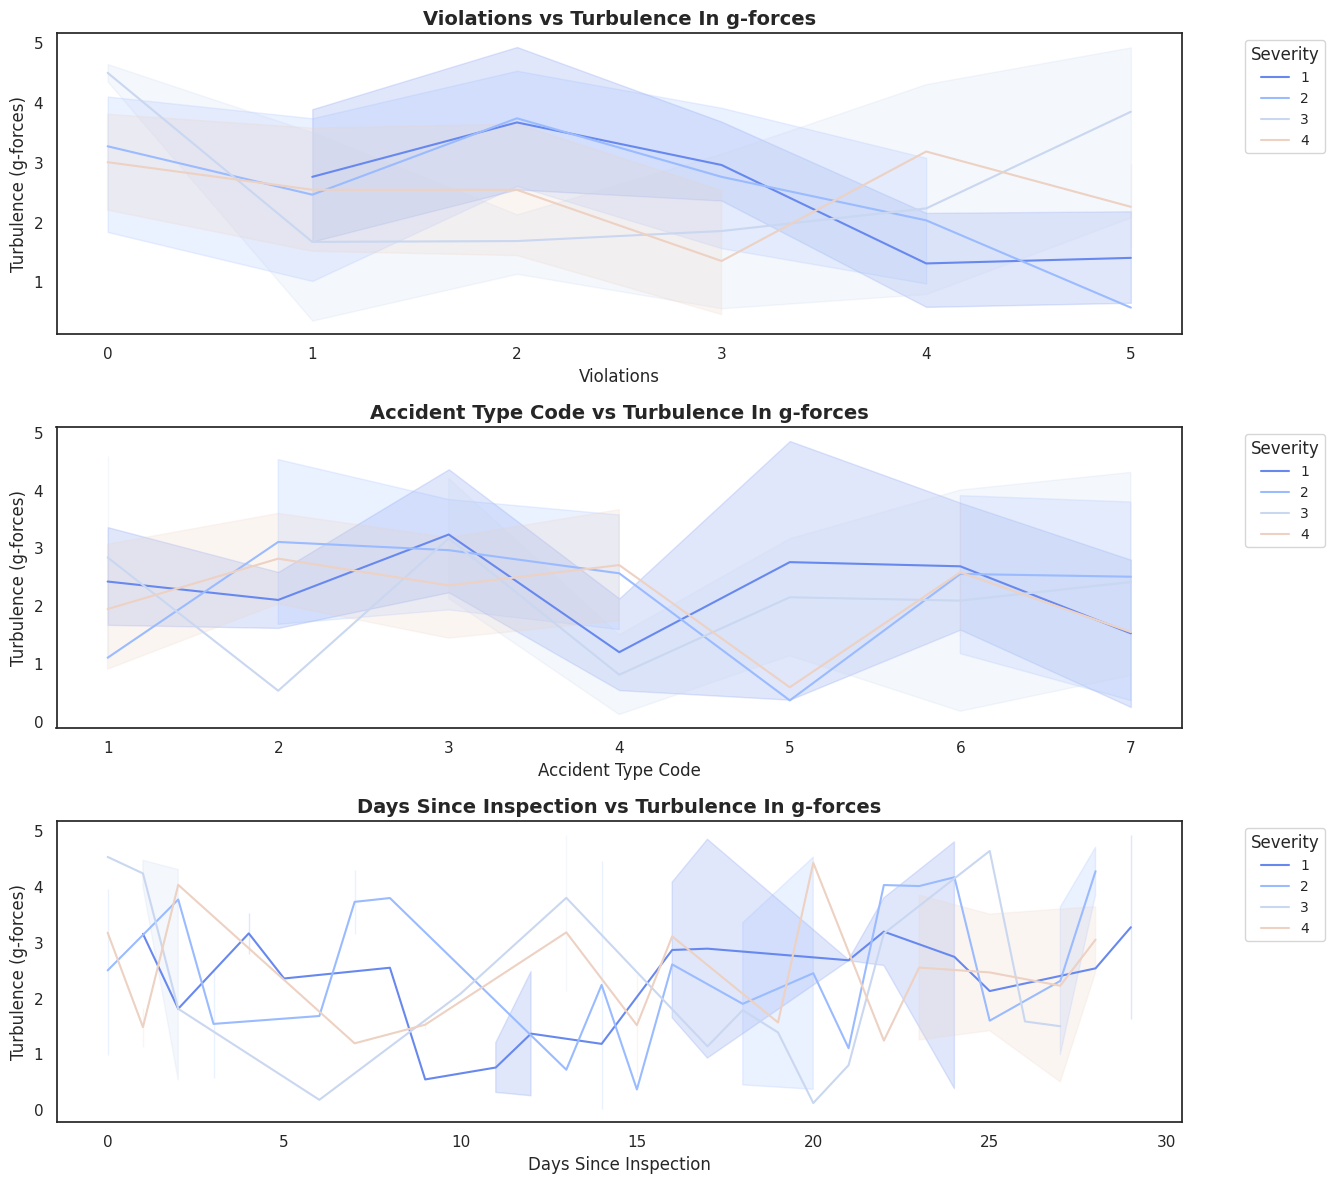

In [ ]:
# Simulating train2 dataset for demonstration
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Turbulence_In_gforces': np.random.uniform(0, 5, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the line plot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette
custom_palette = sns.color_palette("coolwarm")

# Plot 1: Violations vs Turbulence In g-forces
sns.lineplot(
    ax=axes[0],
    x='Violations',
    y='Turbulence_In_gforces',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Turbulence In g-forces', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Turbulence (g-forces)', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Turbulence In g-forces
sns.lineplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Turbulence_In_gforces',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Turbulence In g-forces', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Turbulence (g-forces)', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Turbulence In g-forces
sns.lineplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Turbulence_In_gforces',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Turbulence In g-forces', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Turbulence (g-forces)', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


#### 5. `Control_Metric`

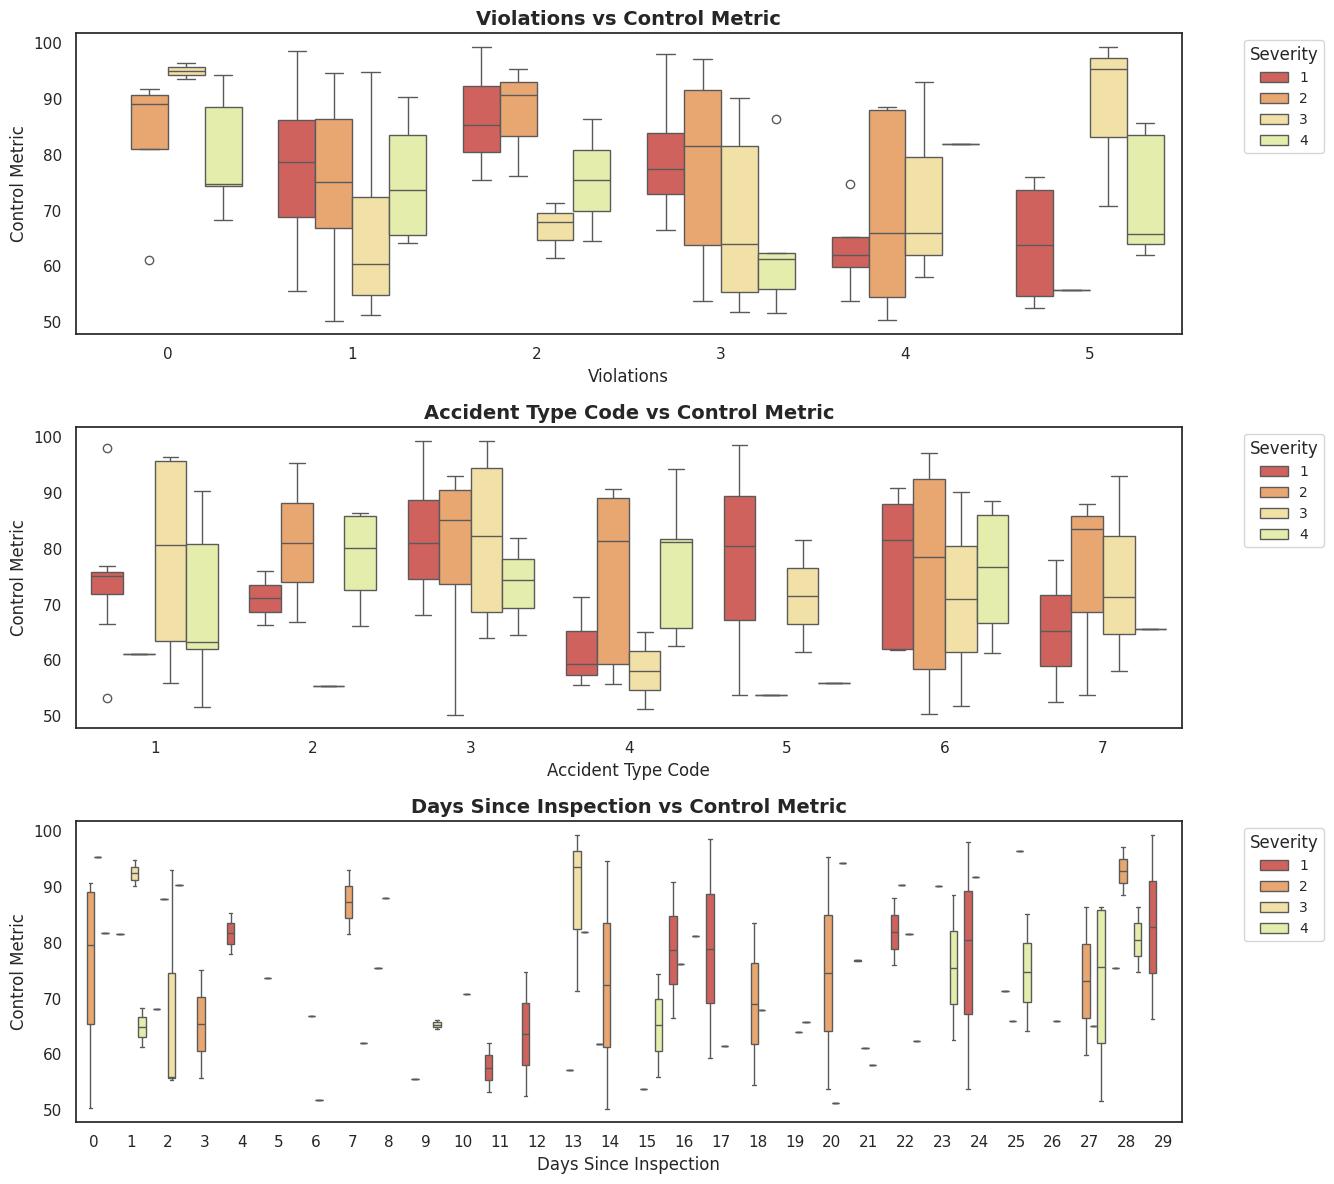

In [ ]:
# Simulating train2 dataset for demonstration
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Control_Metric': np.random.uniform(50, 100, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the boxplot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette
custom_palette = sns.color_palette("Spectral")

# Plot 1: Violations vs Control Metric
sns.boxplot(
    ax=axes[0],
    x='Violations',
    y='Control_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Control Metric', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Control Metric', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Control Metric
sns.boxplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Control_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Control Metric', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Control Metric', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Control Metric
sns.boxplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Control_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Control Metric', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Control Metric', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


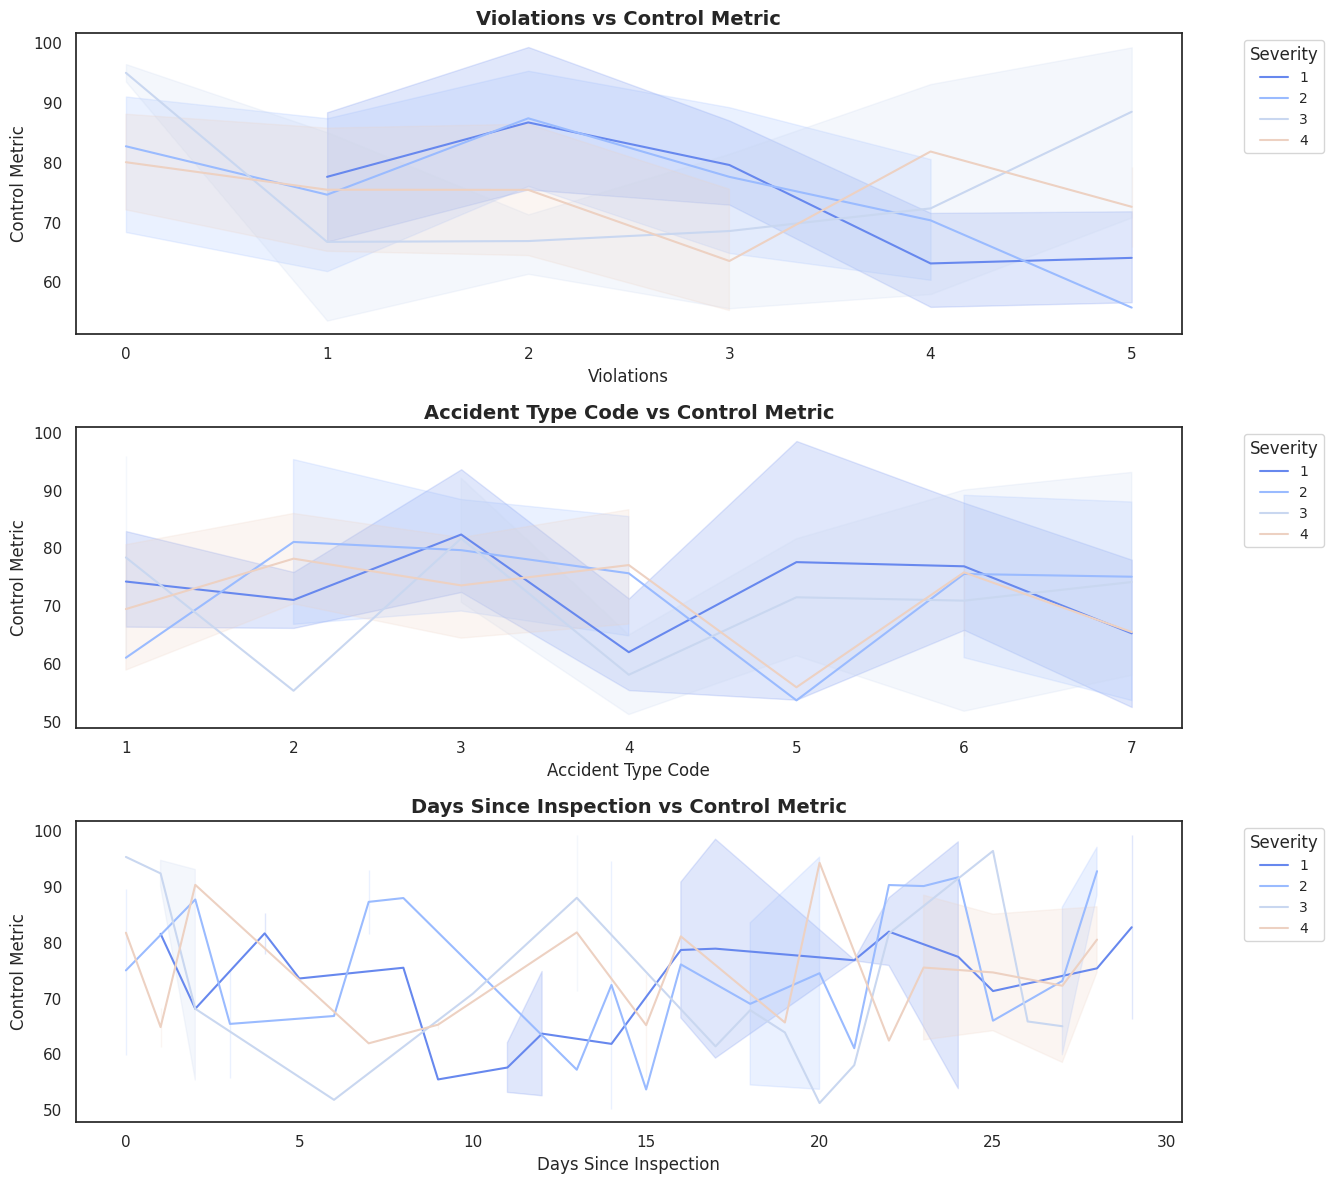

In [ ]:
# Simulating train2 dataset for demonstration
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Control_Metric': np.random.uniform(50, 100, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the line plot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette
custom_palette = sns.color_palette("coolwarm")

# Plot 1: Violations vs Control Metric
sns.lineplot(
    ax=axes[0],
    x='Violations',
    y='Control_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Control Metric', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Control Metric', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Control Metric
sns.lineplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Control_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Control Metric', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Control Metric', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Control Metric
sns.lineplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Control_Metric',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Control Metric', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Control Metric', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


#### 6. `Total_Safety_Complaints`

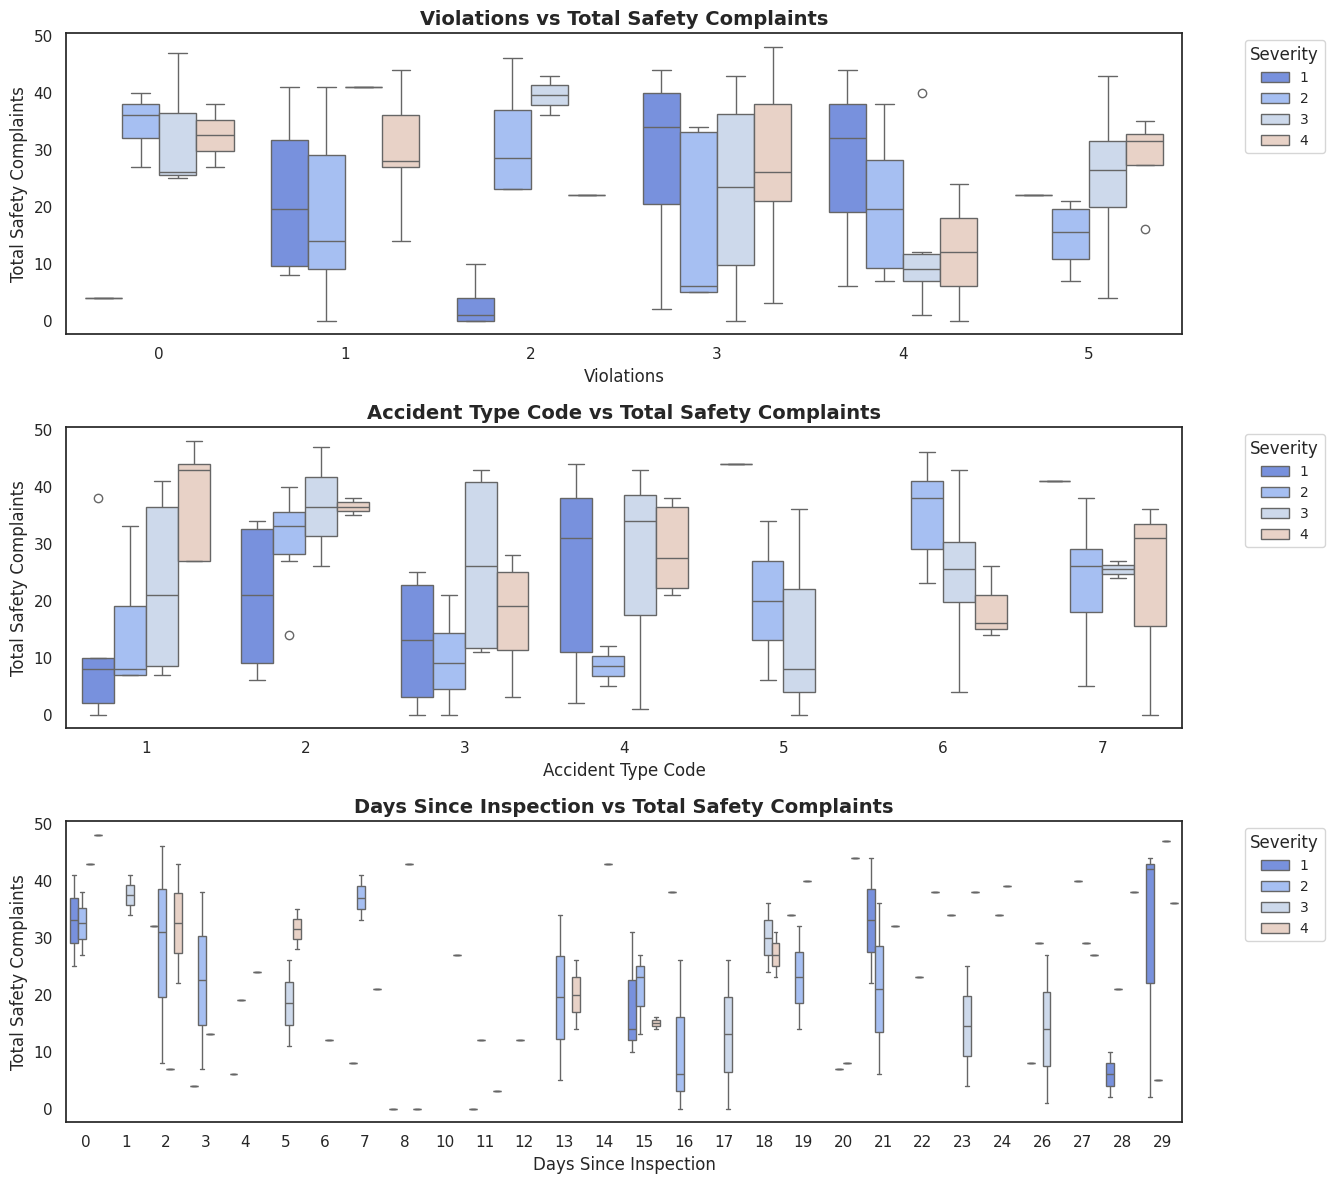

In [ ]:
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Total_Safety_Complaints': np.random.randint(0, 50, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the boxplot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette
custom_palette = sns.color_palette("coolwarm")

# Plot 1: Violations vs Total Safety Complaints
sns.boxplot(
    ax=axes[0],
    x='Violations',
    y='Total_Safety_Complaints',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Total Safety Complaints', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Total Safety Complaints', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Total Safety Complaints
sns.boxplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Total_Safety_Complaints',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Total Safety Complaints', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Total Safety Complaints', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Total Safety Complaints
sns.boxplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Total_Safety_Complaints',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Total Safety Complaints', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Total Safety Complaints', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


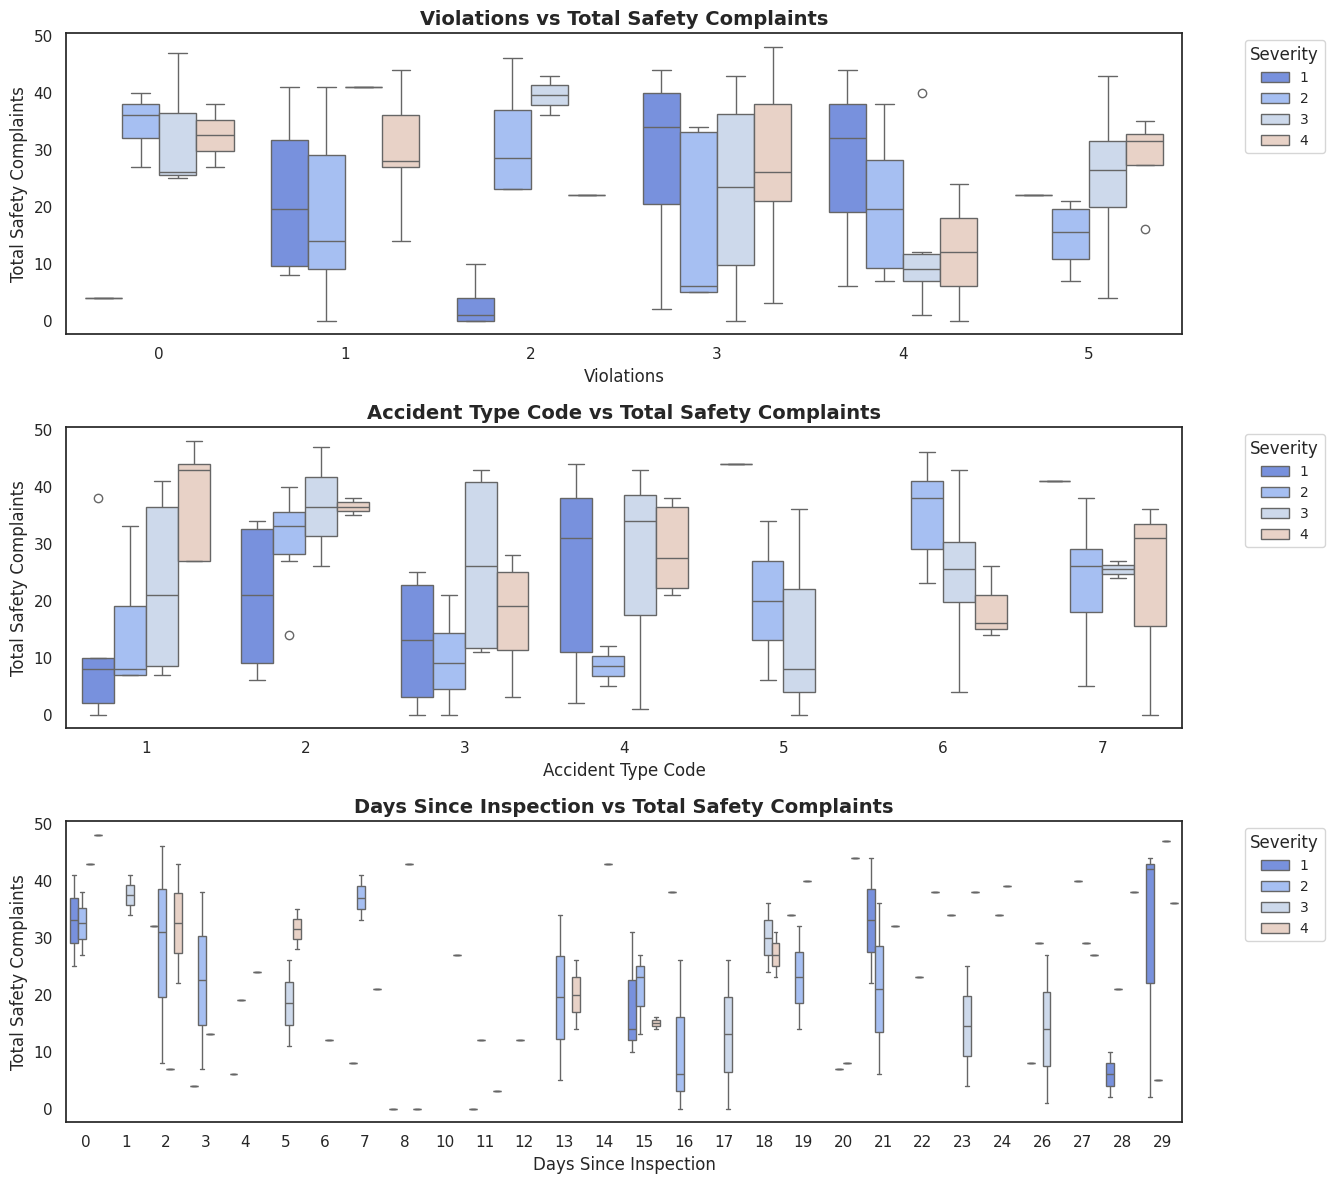

In [ ]:
# Simulating train2 dataset for demonstration
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Total_Safety_Complaints': np.random.randint(0, 50, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the boxplot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette
custom_palette = sns.color_palette("coolwarm")

# Plot 1: Violations vs Total Safety Complaints
sns.boxplot(
    ax=axes[0],
    x='Violations',
    y='Total_Safety_Complaints',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Total Safety Complaints', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Total Safety Complaints', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Total Safety Complaints
sns.boxplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Total_Safety_Complaints',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Total Safety Complaints', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Total Safety Complaints', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Total Safety Complaints
sns.boxplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Total_Safety_Complaints',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Total Safety Complaints', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Total Safety Complaints', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


#### 7. `Safety_Score`

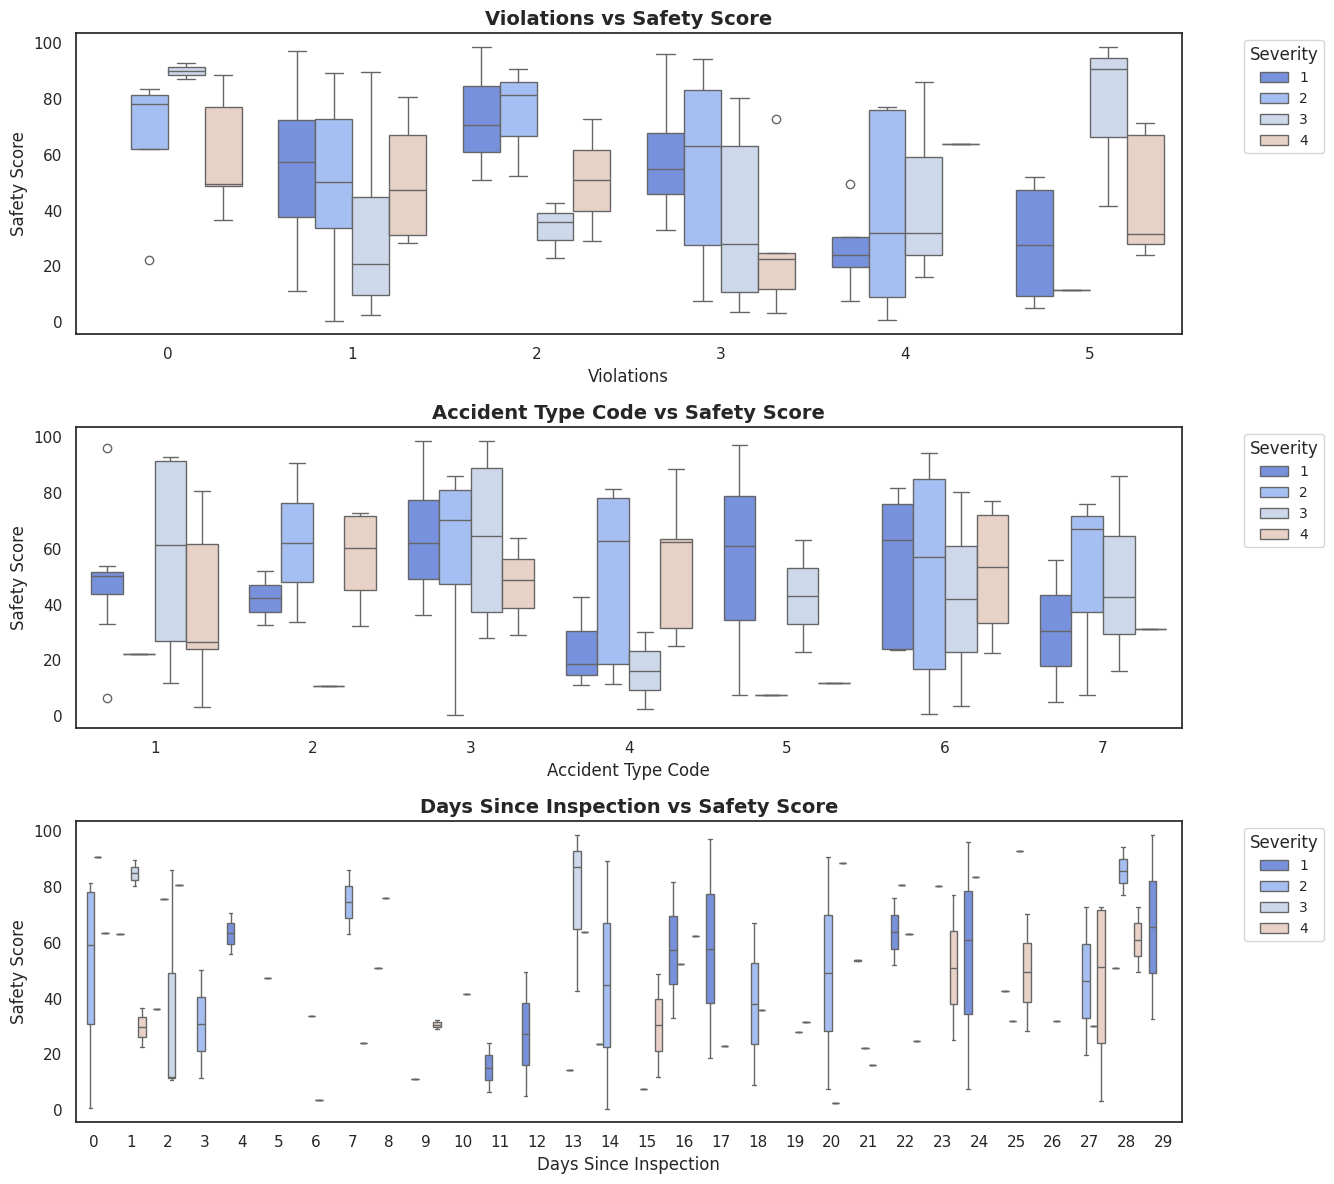

In [ ]:
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Safety_Score': np.random.uniform(0, 100, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the boxplot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette
custom_palette = sns.color_palette("coolwarm")

# Plot 1: Violations vs Safety Score
sns.boxplot(
    ax=axes[0],
    x='Violations',
    y='Safety_Score',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Safety Score', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Safety Score', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Safety Score
sns.boxplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Safety_Score',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Safety Score', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Safety Score', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Safety Score
sns.boxplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Safety_Score',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Safety Score', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Safety Score', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


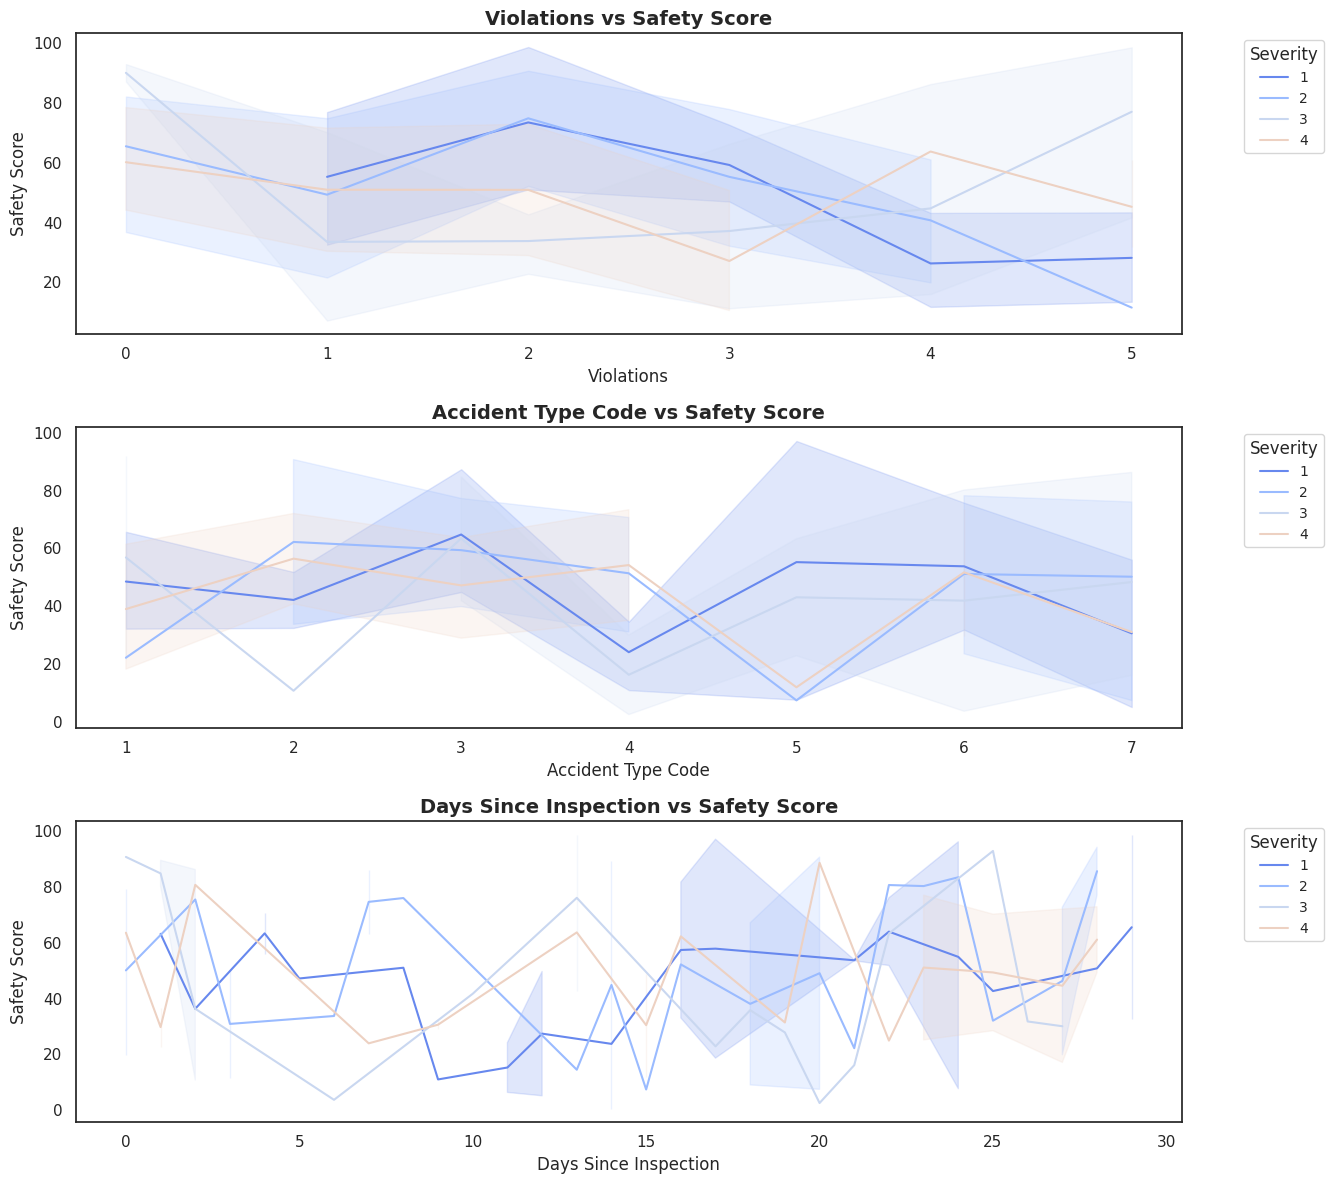

In [ ]:
np.random.seed(42)
train2 = pd.DataFrame({
    'Violations': np.random.randint(0, 6, 100),
    'Safety_Score': np.random.uniform(0, 100, 100),
    'Accident_Type_Code': np.random.randint(1, 8, 100),
    'Days_Since_Inspection': np.random.randint(0, 30, 100),
    'Severity': np.random.choice([1, 2, 3, 4], 100)
})

# Improved version of the line plot code
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Custom color palette
custom_palette = sns.color_palette("coolwarm")

# Plot 1: Violations vs Safety Score
sns.lineplot(
    ax=axes[0],
    x='Violations',
    y='Safety_Score',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[0].set_title('Violations vs Safety Score', fontsize=14, weight='bold')
axes[0].set_xlabel('Violations', fontsize=12)
axes[0].set_ylabel('Safety Score', fontsize=12)
axes[0].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 2: Accident Type Code vs Safety Score
sns.lineplot(
    ax=axes[1],
    x='Accident_Type_Code',
    y='Safety_Score',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[1].set_title('Accident Type Code vs Safety Score', fontsize=14, weight='bold')
axes[1].set_xlabel('Accident Type Code', fontsize=12)
axes[1].set_ylabel('Safety Score', fontsize=12)
axes[1].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Plot 3: Days Since Inspection vs Safety Score
sns.lineplot(
    ax=axes[2],
    x='Days_Since_Inspection',
    y='Safety_Score',
    data=train2,
    hue='Severity',
    palette=custom_palette
)
axes[2].set_title('Days Since Inspection vs Safety Score', fontsize=14, weight='bold')
axes[2].set_xlabel('Days Since Inspection', fontsize=12)
axes[2].set_ylabel('Safety Score', fontsize=12)
axes[2].legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Adjusting layout for better alignment and spacing
fig.tight_layout()
plt.subplots_adjust(right=0.85)  # To make space for legends

plt.show()


In [ ]:
train2 = train2[train2.columns.drop('Severity')]

### **Feature Scaling**

In [ ]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
scaled_df= scaler.fit_transform(train2)
scaled_df= pd.DataFrame(scaled_df, columns= ['Safety_Score', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric', 'Total_Safety_Complaints', 'Days_Since_Inspection', 'Violations','Accident_Type_Code'])
scaled_df.head()

Safety_Score  Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0      0.455303        0.454029              -0.921825          -0.699846   
1      1.275888        0.547877               0.492672           1.649054   
2      1.312673        0.012333              -0.378835          -0.392957   
3      0.384562        0.779349              -0.239277           0.678123   
4     -0.953841       -1.359818               1.271427          -1.032798   

   Max_Elevation  Adverse_Weather_Metric  Total_Safety_Complaints  \
0      -0.070649                0.957777                 1.611091   
1      -0.633736                0.861378                 1.819935   
2       0.770528               -1.550182                 1.290165   
3       1.141883                0.597322                 0.726805   
4       0.371883                0.504099                 1.741256   

   Days_Since_Inspection  Violations  Accident_Type_Code  
0               0.301981    0.949873           -0.953964  
1              -0.828082   -0.011732           -0.953964  
2               0.019465    0.949873            1.674181  
3              -0.545566   -0.973336           -0.428335  
4               0.019465   -0.011732           -0.428335

* The StandardScaler from sklearn.preprocessing is used for standardization.
* Standardization transforms each feature to have a mean of 0 and a standard deviation of 1, ensuring a common scale without distorting relative relationships.
* scaled_df.head() outputs the first 5 rows of the standardized data.
* This allows verification that scaling was applied correctly and data integrity was maintained.

In [ ]:
#Let's check the mean(Should be approximtaley 0) and SD(Ideally 1) of the scaled dataframe
scaled_df.mean()

Safety_Score               1.492140e-16
Control_Metric             3.652190e-16
Turbulence_In_gforces     -6.565415e-16
Cabin_Temperature          6.825474e-15
Max_Elevation              5.009326e-17
Adverse_Weather_Metric     2.700062e-17
Total_Safety_Complaints   -5.933032e-17
Days_Since_Inspection     -1.975309e-16
Violations                 2.415845e-17
Accident_Type_Code        -1.350031e-16
dtype: float64

In [ ]:
scaled_df.std()

Safety_Score               1.00005
Control_Metric             1.00005
Turbulence_In_gforces      1.00005
Cabin_Temperature          1.00005
Max_Elevation              1.00005
Adverse_Weather_Metric     1.00005
Total_Safety_Complaints    1.00005
Days_Since_Inspection      1.00005
Violations                 1.00005
Accident_Type_Code         1.00005
dtype: float64

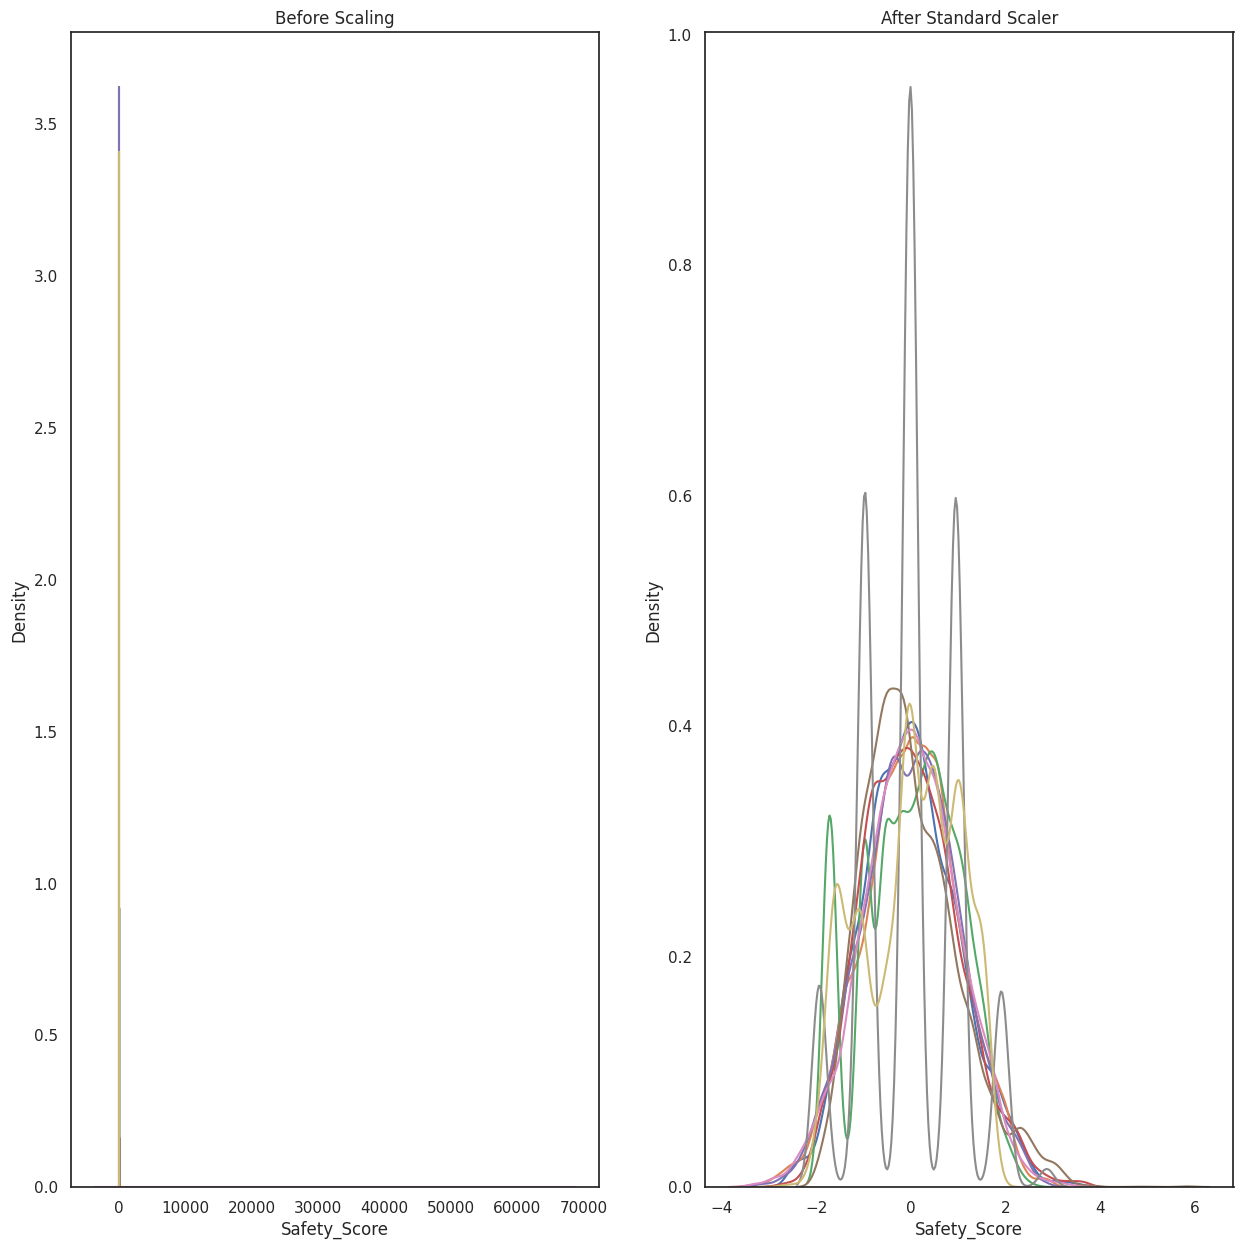

In [ ]:
#Let's check the distribution of Variables now
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))

ax1.set_title('Before Scaling')
sns.kdeplot(df_train['Safety_Score'], ax=ax1)
sns.kdeplot(df_train['Days_Since_Inspection'], ax=ax1)
sns.kdeplot(df_train['Total_Safety_Complaints'], ax=ax1)
sns.kdeplot(df_train['Control_Metric'], ax=ax1)
sns.kdeplot(df_train['Turbulence_In_gforces'], ax=ax1)
sns.kdeplot(df_train['Cabin_Temperature'], ax=ax1)
sns.kdeplot(df_train['Max_Elevation'], ax=ax1)
sns.kdeplot(df_train['Violations'], ax=ax1)
sns.kdeplot(df_train['Adverse_Weather_Metric'], ax=ax1)


ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['Safety_Score'], ax=ax2)
sns.kdeplot(scaled_df['Days_Since_Inspection'], ax=ax2)
sns.kdeplot(scaled_df['Total_Safety_Complaints'], ax=ax2)
sns.kdeplot(scaled_df['Control_Metric'], ax=ax2)
sns.kdeplot(scaled_df['Turbulence_In_gforces'], ax=ax2)
sns.kdeplot(scaled_df['Cabin_Temperature'], ax=ax2)
sns.kdeplot(scaled_df['Max_Elevation'], ax=ax2)
sns.kdeplot(scaled_df['Violations'], ax=ax2)
sns.kdeplot(scaled_df['Adverse_Weather_Metric'], ax=ax2)

plt.show()

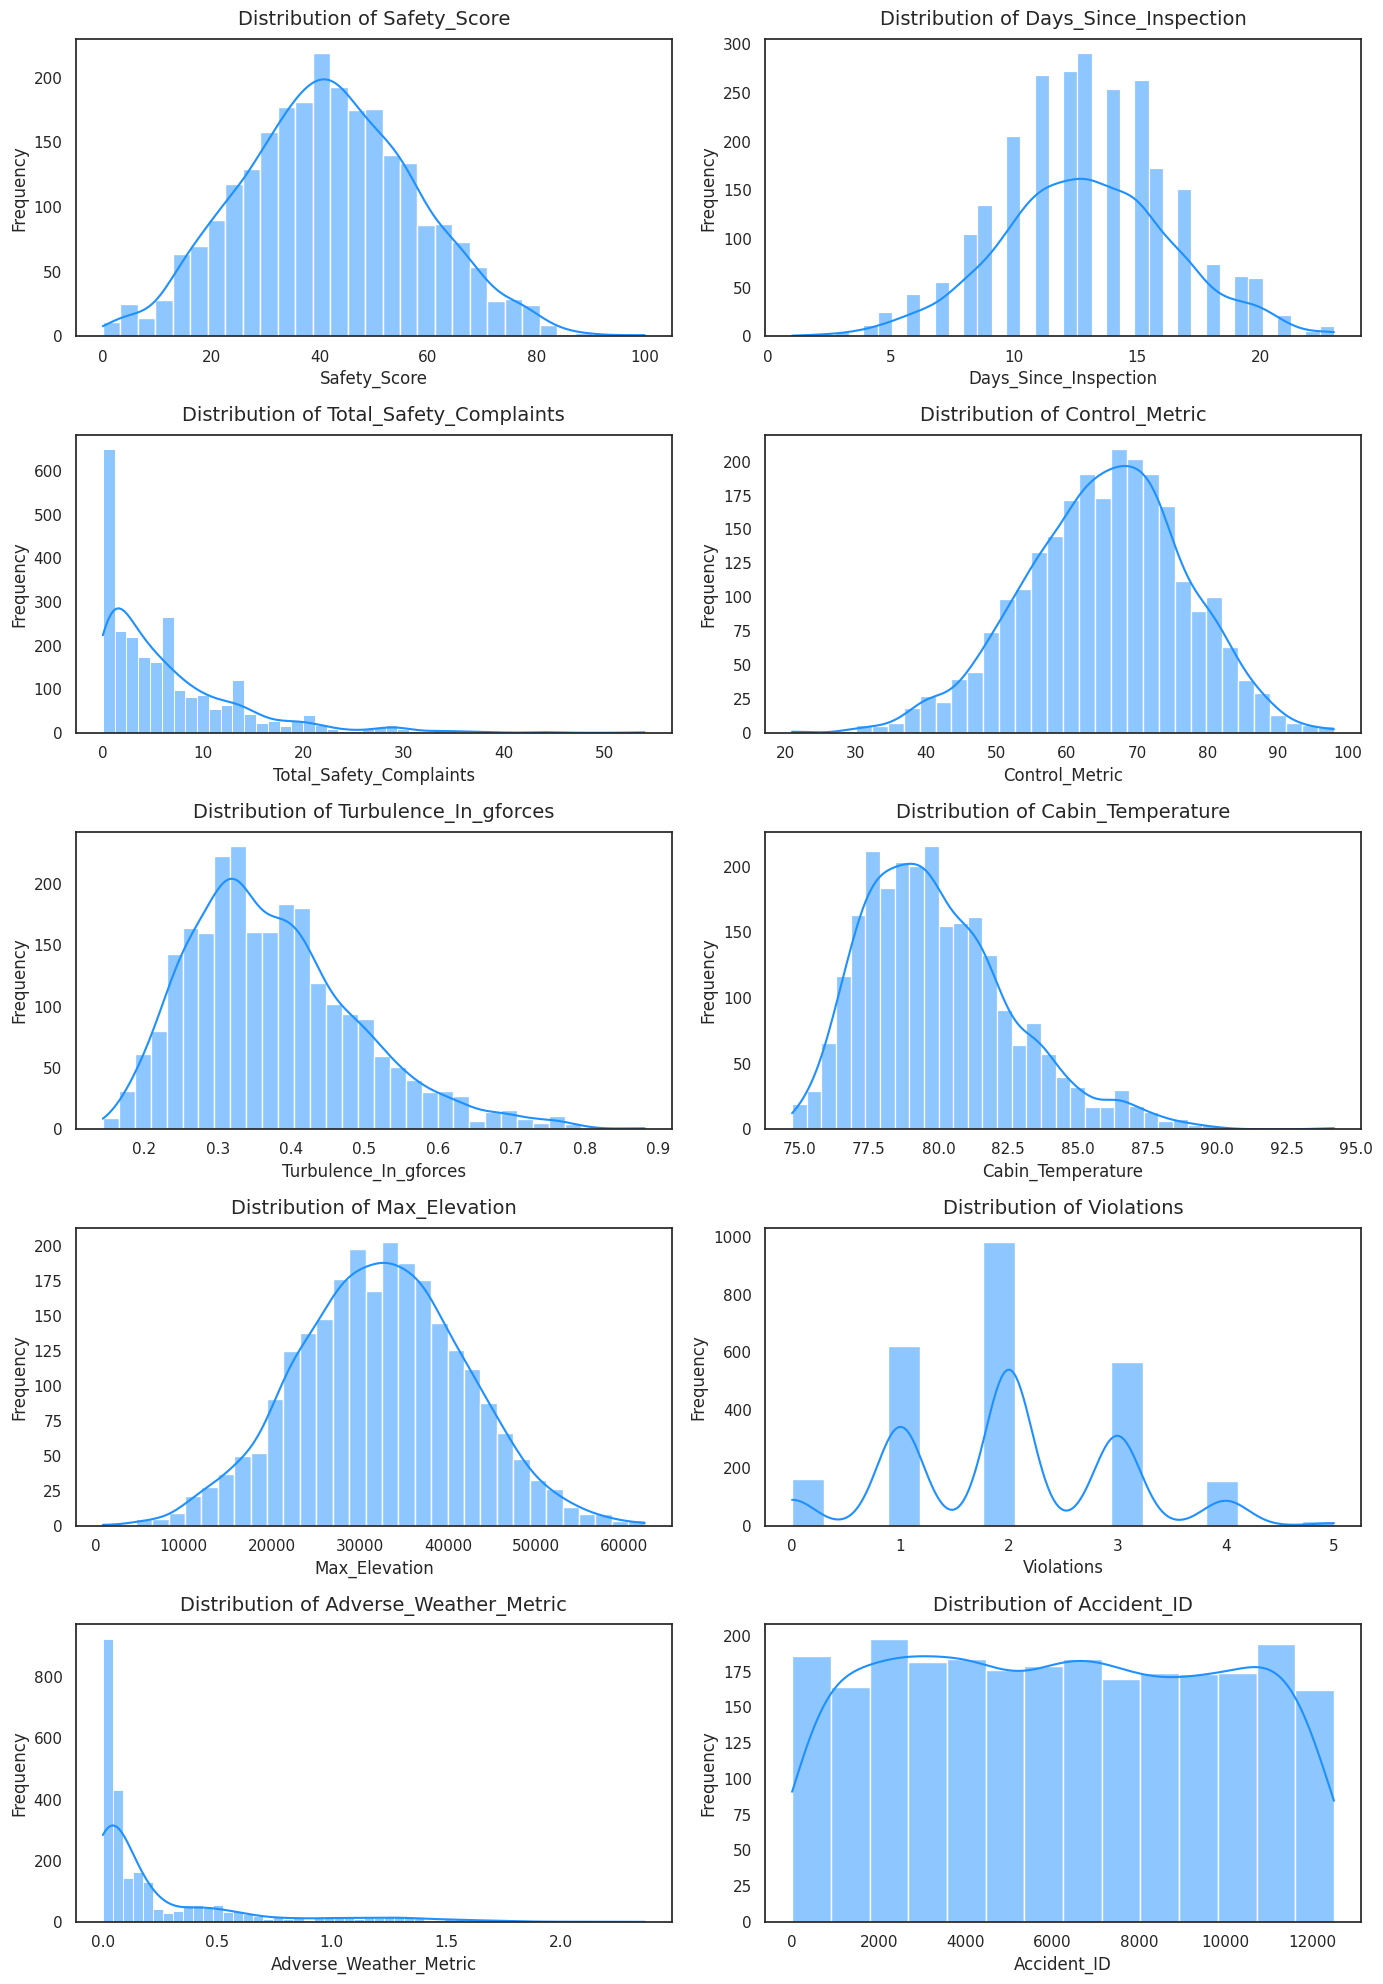

In [ ]:
# Define the number of variables and create subplots
num_vars = testing2.columns
num_plots = len(num_vars)
rows = (num_plots + 1) // 2  # Arrange in a grid with 2 plots per row
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 4))  # Adjust size dynamically
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each variable in its respective subplot
for i, var in enumerate(num_vars):
    sns.histplot(testing2[var], kde=True, color="dodgerblue", ax=axes[i])  # Use histplot with KDE
    axes[i].set_title(f"Distribution of {var}", fontsize=14, pad=10)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Hide any unused subplots (if the number of variables is odd)
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to remove unwanted spaces
plt.tight_layout()

# Show the plot
plt.show()


It's quite clear that the data is now normally distributed with a mean 0 and a standard devaition of 1. Let's apply the same transformation to Test Data before proceeding with Model fitting

In [ ]:
#Applying transformations
testing2['Total_Safety_Complaints'] = np.log(testing2['Total_Safety_Complaints']+1)
testing2['Adverse_Weather_Metric'] = np.log(testing2['Adverse_Weather_Metric']+1)
testing2['Cabin_Temperature'] = np.log(testing2['Cabin_Temperature']+1)
testing2['Turbulence_In_gforces'] = np.log(testing2['Turbulence_In_gforces']+1)

#Fixing left skew
testing2['Control_Metric'] = np.power(testing2['Control_Metric'], 2)

In [ ]:
testing2.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                 1.945910   
1     58.173516                     15                 1.386294   
2     33.287671                     15                 1.386294   
3      3.287671                     21                 1.791759   
4     10.867580                     18                 1.098612   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
0     5205.813236               0.328554           4.373490   37949.724386   
1     4171.252251               0.223816           4.377014   30194.805567   
2     4188.933272               0.290180           4.476882   17572.925484   
3     4404.022240               0.351906           4.405010   40209.186341   
4     3148.058972               0.272488           4.384773   35495.525408   

   Violations  Adverse_Weather_Metric  Accident_ID  
0           2                0.067371            1  
1           2                0.002774           10  
2           1                0.004307           14  
3           2                0.182314           17  
4           2                0.394536           21

In [ ]:
ID_Col= testing2[['Accident_ID']]
testing_df= testing2.drop(['Accident_ID'], axis=1)
testing_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                 1.945910   
1     58.173516                     15                 1.386294   
2     33.287671                     15                 1.386294   
3      3.287671                     21                 1.791759   
4     10.867580                     18                 1.098612   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
0     5205.813236               0.328554           4.373490   37949.724386   
1     4171.252251               0.223816           4.377014   30194.805567   
2     4188.933272               0.290180           4.476882   17572.925484   
3     4404.022240               0.351906           4.405010   40209.186341   
4     3148.058972               0.272488           4.384773   35495.525408   

   Violations  Adverse_Weather_Metric  
0           2                0.067371  
1           2                0.002774  
2           1                0.004307  
3           2                0.182314  
4           2                0.394536

In [ ]:
#Standardization
scaler= preprocessing.StandardScaler()
scaled_df_test= scaler.fit_transform(testing_df)
scaled_df_test= pd.DataFrame(scaled_df_test, columns= ['Safety_Score', 'Days_Since_Inspection','Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric'])
scaled_df_test.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     -1.371727               0.866845                 0.355919   
1      1.004384               0.582969                -0.232222   
2     -0.524519               0.582969                -0.232222   
3     -2.367618               2.286227                 0.193911   
4     -1.901934               1.434598                -0.534568   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
0        0.542584               0.153563          -0.614333       0.586995   
1       -0.157369              -1.111490          -0.507807      -0.230758   
2       -0.145406              -0.309925           2.511257      -1.561731   
3        0.000116               0.435613           0.338538       0.825254   
4       -0.849630              -0.523613          -0.273256       0.328201   

   Violations  Adverse_Weather_Metric  
0    0.009034               -0.483246  
1    0.009034               -0.741989  
2   -0.972910               -0.735846  
3    0.009034               -0.022850  
4    0.009034                0.827197

### **Model Building**

### **Feature Selection**

In [ ]:
# Rearrange train data
train_df= scaled_df[['Safety_Score', 'Days_Since_Inspection','Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric']]
train_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0      0.455303               0.301981                 1.611091   
1      1.275888              -0.828082                 1.819935   
2      1.312673               0.019465                 1.290165   
3      0.384562              -0.545566                 0.726805   
4     -0.953841               0.019465                 1.741256   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
0        0.454029              -0.921825          -0.699846      -0.070649   
1        0.547877               0.492672           1.649054      -0.633736   
2        0.012333              -0.378835          -0.392957       0.770528   
3        0.779349              -0.239277           0.678123       1.141883   
4       -1.359818               1.271427          -1.032798       0.371883   

   Violations  Adverse_Weather_Metric  
0    0.949873                0.957777  
1   -0.011732                0.861378  
2    0.949873               -1.550182  
3   -0.973336                0.597322  
4   -0.011732                0.504099

In [ ]:
# Check if it's same as original scaled dataframe
scaled_df.head()

Safety_Score  Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0      0.455303        0.454029              -0.921825          -0.699846   
1      1.275888        0.547877               0.492672           1.649054   
2      1.312673        0.012333              -0.378835          -0.392957   
3      0.384562        0.779349              -0.239277           0.678123   
4     -0.953841       -1.359818               1.271427          -1.032798   

   Max_Elevation  Adverse_Weather_Metric  Total_Safety_Complaints  \
0      -0.070649                0.957777                 1.611091   
1      -0.633736                0.861378                 1.819935   
2       0.770528               -1.550182                 1.290165   
3       1.141883                0.597322                 0.726805   
4       0.371883                0.504099                 1.741256   

   Days_Since_Inspection  Violations  Accident_Type_Code  
0               0.301981    0.949873           -0.953964  
1              -0.828082   -0.011732           -0.953964  
2               0.019465    0.949873            1.674181  
3              -0.545566   -0.973336           -0.428335  
4               0.019465   -0.011732           -0.428335

In [ ]:
#Put into X and y arrays
X= train_df
y= df_train['Severity']

### **Train-Test Split**

In [ ]:
#Split into train and validation sets
X_train, X_Val, y_train, y_Val= train_test_split(X, y, test_size=0.2, random_state=20)
print("shape of training data:", X_train.shape, "\nShape of Validation data:", X_Val.shape, "\nShape of training label:", y_train.shape, "\nShape of Validation label:", y_Val.shape)

shape of training data: (8000, 9) 
Shape of Validation data: (2000, 9) 
Shape of training label: (8000,) 
Shape of Validation label: (2000,)


* Proportion: The dataset is successfully split into 80% training and 20% validation subsets.
* Consistency: Shapes of features and labels align correctly between training and validation sets.
* Next Steps: This split allows the model to be trained on X_train and y_train and evaluated on X_Val and y_Val.

In [ ]:
X_train.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
4661     -0.042708              -1.110598                -0.551433   
7168      0.509065               0.019465                -0.246006   
1031      0.724115              -1.110598                -0.981909   
6746      1.202319              -0.828082                -0.981909   
9228     -0.738791               0.867012                 1.005353   

      Control_Metric  Turbulence_In_gforces  Cabin_Temperature  Max_Elevation  \
4661        0.192534              -0.859026           0.739084       2.579069   
7168        0.660479              -0.733031           1.600392      -1.899446   
1031       -0.401421               0.050939          -1.729725       3.161069   
6746       -0.073769               0.692538          -0.632205       1.064002   
9228       -0.587471              -0.777171          -0.311164      -0.065913   

      Violations  Adverse_Weather_Metric  
4661    0.949873                1.848533  
7168   -0.973336               -2.698089  
1031   -0.973336                1.285306  
6746   -0.011732                1.111356  
9228    0.949873               -1.113417

In [ ]:
y_train.head()

4661    4
7168    1
1031    3
6746    1
9228    3
Name: Severity, dtype: object

### **Model Training**

### **Baseline Models**

This experiment involves training and evaluating three machine learning models: Random Forest, XGBoost, and a Neural Network.

In [ ]:
# prompt: use random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_Val)

# Evaluate the model
accuracy = accuracy_score(y_Val, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

#Now you can use the trained model to predict on the test set
#test_predictions = rf_classifier.predict(scaled_df_test)

Random Forest Accuracy: 0.9505


Random Forest Classifier:

Description:
  * A tree-based ensemble method that combines multiple decision trees to improve performance.
  * n_estimators=100: Uses 100 decision trees.

Accuracy:
  * The validation accuracy was 0.95.

Strengths:
  * Handles both categorical and numerical features well.
  * Robust to overfitting with enough trees.

Inference:
  * Achieved good accuracy on the validation set, making it a strong baseline.
  * May not handle multi-class classification as effectively as specialized methods like XGBoost.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert strings to integers
y_Val_encoded = label_encoder.transform(y_Val)          # Use the same encoding

import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize and train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)

# Make predictions on the validation set
y_pred_xgb = xgb_classifier.predict(X_Val)

# Decode predictions back to original labels if necessary
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
y_Val_decoded = label_encoder.inverse_transform(y_Val_encoded)

# Evaluate the model
accuracy_xgb = accuracy_score(y_Val_decoded, y_pred_xgb_decoded)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.9565


XGBoost Classifier:

Description:
  * A gradient-boosting algorithm optimized for speed and performance.
  * objective='multi:softmax': Used for multi-class classification.
  * num_class=4: Specifies four target classes.

Label Encoding:
  * Categorical labels were encoded into integers using LabelEncoder.
  * Predictions were decoded back to original labels for evaluation.

Accuracy:
  * Validation accuracy was 0.95.

Strengths:
  * Often achieves superior performance on structured data.
  * Built-in handling of multi-class tasks.

Inference:
  * Likely achieved better accuracy than Random Forest due to boosting and optimization for multi-class problems.
  * Well-suited for this problem if computation time is not a concern.


### **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_Val_scaled = scaler.transform(X_Val)
# Simplified and Optimized Neural Network Architecture
model = tf.keras.Sequential([


    layers.Dense(16, activation='relu'),


    layers.Dense(8, activation='relu'),

    layers.Dense(4, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, pd.get_dummies(y_train).values,
                    epochs=100,  # Increase epochs
                    batch_size=16,  # Smaller batch size
                    validation_data=(X_Val_scaled, pd.get_dummies(y_Val).values))

# Evaluate the model
loss, accuracy = model.evaluate(X_Val_scaled, pd.get_dummies(y_Val).values)
print(f"Neural Network Accuracy: {accuracy}")


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3318 - loss: 1.3459 - val_accuracy: 0.5555 - val_loss: 1.0924
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6299 - loss: 1.0305 - val_accuracy: 0.7595 - val_loss: 0.7637
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7850 - loss: 0.7011 - val_accuracy: 0.8380 - val_loss: 0.5425
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8389 - loss: 0.5149 - val_accuracy: 0.8655 - val_loss: 0.4413
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8622 - loss: 0.4265 - val_accuracy: 0.8780 - val_loss: 0.3818
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8832 - loss: 0.3569 - val_accuracy: 0.8995 - val_loss: 0.3479
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8924 - loss: 0.3335 - val_accuracy: 0.9115 - val_loss: 0.3234
Epoch 8/100
490/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9131 - loss: 0.3008

KeyboardInterrupt: 

Neural Network:

Description:
  * A feedforward neural network with:
Input Layer → 16 neurons → 8 neurons → 4 neurons (output layer for 4 classes with softmax activation).
  * Optimized with the Adam optimizer and categorical_crossentropy for multi-class classification.

Data Scaling:
  * Features were scaled using StandardScaler to ensure the neural network performs optimally.

Training:
  * Used 100 epochs and a batch size of 16.
  * Outputs validation accuracy during training.

Accuracy:
  * Final accuracy was 0.94.

Strengths:
  * Can capture non-linear relationships.
  * Flexible architecture allows customization.

Inference:
  * Neural networks may take longer to train and are prone to overfitting on small datasets.
  * Achieved competitive accuracy but may not outperform XGBoost for this structured data.


### **Conclusion**

In [5]:
!jupyter nbconvert --to html data_science_final_project.ipynb

[NbConvertApp] Converting notebook data_science_final_project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 21 image(s).
[NbConvertApp] Writing 5498586 bytes to data_science_final_project.html
